In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import seaborn as sns
import os
from make_plot_dir import plots_dir
import json
from make_json_dir import json_dir
from sklearn.metrics import roc_auc_score, roc_curve, precision_score, f1_score, ConfusionMatrixDisplay
from notebook_function_space import compare_by_feature

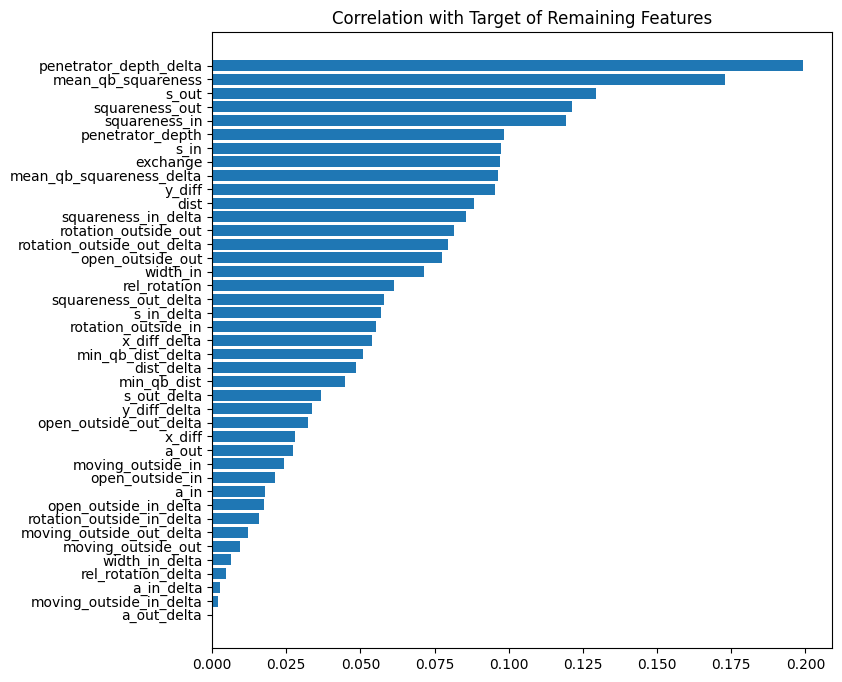

In [3]:
%run rush-win-predictor-2v2-feature-selection-general.ipynb

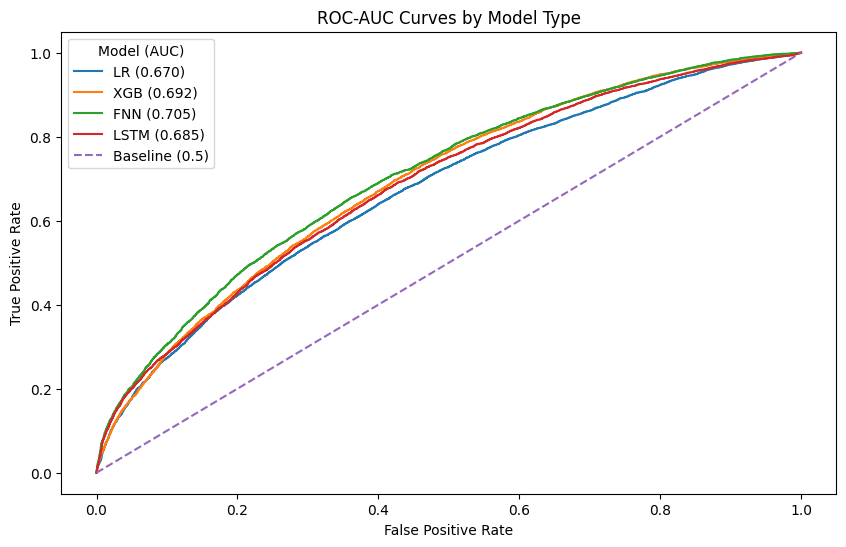

In [5]:
types = ['lr', 'xgb', 'fnn', 'lstm']
type_probs = []
plt.figure(figsize = (10,6))
for abbr in types:
    fname = os.path.join(json_dir, '{}_probs.json'.format(abbr))
    with open(fname, 'r') as openfile:
        probs = json.load(openfile)
    type_probs.append(probs)
    fpr, tpr, thresholds = roc_curve(y,probs)
    auc_score = roc_auc_score(y,probs)
    plt.plot(fpr, tpr,
            label = f'{abbr.upper()} ({auc_score :0.3f})')
plt.plot(np.linspace(0, 1, 100),
         np.linspace(0, 1, 100),
         label='Baseline (0.5)',
         linestyle='--')
plt.legend(title = 'Model (AUC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curves by Model Type')
plt.savefig(os.path.join(plots_dir,'roc_by_model_type.png'))

,LR,XGB,FNN,LSTM
frame_from_snap,,,,
1,0.547788,0.526533,0.548597,0.544084
2,0.554079,0.560810,0.563326,0.558952
3,0.548453,0.570293,0.574684,0.571101
4,0.558620,0.547174,0.599492,0.579684
5,0.558863,0.566211,0.598943,0.585011
6,0.559766,0.569911,0.616580,0.590377
7,0.548170,0.596770,0.613513,0.591025
8,0.551487,0.600076,0.614980,0.589879
9,0.553481,0.627190,0.616143,0.591008


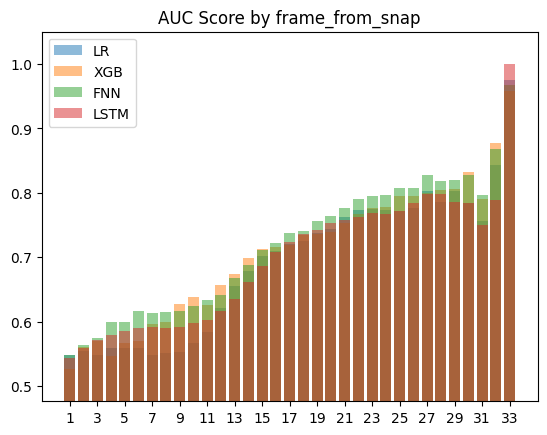

In [7]:
auc_lambda = lambda x: roc_auc_score(x['rush_win'], x['proba'])

def plot_aucs_by_frame(auc_df, frame_center):
    for i, col in enumerate(auc_df.columns):
        plt.bar(auc_df.index, auc_df[col], label = col, alpha = 0.5)
    xmin, xmax = auc_df.index.min(), auc_df.index.max()
    plt.xticks(np.arange(xmin, xmax+1, 2))
    plt.gca().set_ylim(bottom = (auc_df.values.min() - 0.05))
    plt.legend()
    plt.title(f'AUC Score by {frame_center}')
    plt.savefig(os.path.join(plots_dir,'auc_by_{}.png'.format(frame_center)))
def get_aucs_by_frame(data, frame_center, plot = True):
    auc_df = pd.DataFrame()
    for model_type, probs in zip(types,type_probs):
        data['proba'] = probs
        auc_df[model_type.upper()] = data.groupby(frame_center).apply(auc_lambda)
    if plot == True:
        plot_aucs_by_frame(auc_df, frame_center)
    return auc_df
get_aucs_by_frame(pro_frames_merge_trunc, 'frame_from_snap')

,LR,XGB,FNN,LSTM
frame_from_overlap,,,,
-22,0.446154,0.469231,0.453846,0.542308
-21,0.463901,0.584860,0.596444,0.612608
-20,0.488662,0.524943,0.590514,0.589380
-19,0.561287,0.568474,0.604145,0.606437
-18,0.561882,0.568292,0.618276,0.630761
-17,0.539302,0.565514,0.596563,0.615952
-16,0.524538,0.570884,0.597908,0.599806
-15,0.535024,0.591637,0.584000,0.597264
-14,0.522302,0.559214,0.566126,0.585553


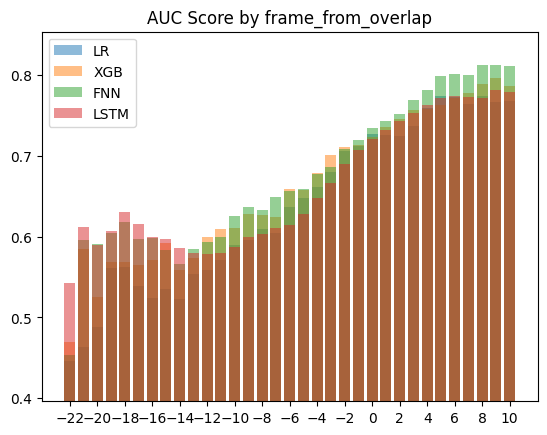

In [8]:
get_aucs_by_frame(pro_frames_merge_trunc, 'frame_from_overlap')

In [10]:
best_feature_lists = []
for abbr in types:
    fname = os.path.join(json_dir,'{}_best_features.json'.format(abbr))
    with open(fname, 'r') as openfile:
        best_features = json.load(openfile)
    best_feature_lists.append(best_features)
all_best_features = set().union(*best_feature_lists)
all_best_features = sorted([feat.lower() for feat in all_best_features])
all_best_features[all_best_features.index('te')] = 'TE'
feature_df = pd.DataFrame(all_best_features, columns = ['feature'])
for abbr, bfl in zip(types,best_feature_lists):
    feature_df[abbr.upper()] = np.where(feature_df['feature'].isin(bfl), 1, 0)
feature_df.set_index('feature', inplace = True)
feature_df['Total'] = feature_df.sum(axis = 1)
feature_df.sort_values('Total', inplace = True)
# total_counts = feature_df['Total'].value_counts().sort_index()
# total_counts
feature_df

,LR,XGB,FNN,LSTM,Total
feature,,,,,
TE,0,0,0,1,1
stunt_type,0,1,0,0,1
moving_outside_in,0,0,0,1,1
moving_outside_out,1,0,0,0,1
open_outside_in_delta,0,1,0,0,1
squareness_in_delta,0,1,0,0,1
squareness_in,0,0,0,1,1
rotation_outside_out,0,0,0,1,1
rotation_outside_out_delta,0,0,1,1,2


In [12]:
feature_df = pd.DataFrame()
for abbr in types[:2]+['ln']:
    fname = '../../data/{}_best_feat_imp.csv'.format(abbr)
    fidf = pd.read_csv(fname, index_col = 0)
    feature_df = pd.concat((feature_df,fidf), axis = 1)
    col_name = abbr.upper() + '_FI'
    feature_df.columns.values[-1] = col_name
    feature_df[col_name] = feature_df[col_name] / feature_df[col_name].sum()
    feature_df[abbr.upper() + '_RANK'] = feature_df[col_name].rank(method = 'min', ascending = False)
    feature_df[abbr.upper()] = np.where(feature_df[col_name] > 0.0, 1, 0)
feature_df.rename(columns = {col : col.replace('LN','FNN') for col in feature_df if 'LN' in col}, inplace = True)
with open(os.path.join(json_dir, 'lstm_best_features.json'), 'r') as openfile:
    lstm_features = pd.Series(json.load(openfile))
lstm_df = pd.DataFrame(np.zeros(len(lstm_features)), columns = ['LSTM'], index = lstm_features.values)
feature_df = pd.concat((feature_df, lstm_df), axis = 1)
feature_df['LSTM'] = np.where(feature_df.index.isin(lstm_features), 1, 0)
types_upper = [abbr.upper() for abbr in types]
feature_df[types_upper] = feature_df[types_upper].fillna(0)
feature_df['TOTAL'] = feature_df[types_upper].sum(axis = 1)
feature_df.sort_values('TOTAL', inplace = True)
total_counts = feature_df['TOTAL'].value_counts().sort_index()
feature_df['RANK'] = feature_df[[col for col in feature_df if 'RANK' in col]].mean(axis = 1)
feature_df['AVG_FI'] = feature_df[['LR_FI','XGB_FI','FNN_FI']].mean(axis = 1)
feature_df.fillna(0, inplace = True)
feature_df

,LR_FI,LR_RANK,LR,XGB_FI,XGB_RANK,XGB,FNN_FI,FNN_RANK,FNN,LSTM,TOTAL,RANK,AVG_FI
squareness_in_delta,0.000000,0.0,0.0,0.025567,17.0,1.0,0.000000,0.0,0.0,0,1.0,17.000000,0.025567
squareness_in,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,1,1.0,0.000000,0.000000
TE,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,1,1.0,0.000000,0.000000
stunt_type,0.000000,0.0,0.0,0.071455,5.0,1.0,0.000000,0.0,0.0,0,1.0,5.000000,0.071455
open_outside_in_delta,0.000000,0.0,0.0,0.037720,16.0,1.0,0.000000,0.0,0.0,0,1.0,16.000000,0.037720
rotation_outside_out,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,1,1.0,0.000000,0.000000
moving_outside_in,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,1,1.0,0.000000,0.000000
moving_outside_out,0.048832,9.0,1.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0,1.0,9.000000,0.048832
width_in,0.034257,14.0,1.0,0.000000,0.0,0.0,0.000000,0.0,0.0,1,2.0,14.000000,0.034257
s_out,0.076249,5.0,1.0,0.046959,13.0,1.0,0.000000,0.0,0.0,0,2.0,9.000000,0.061604


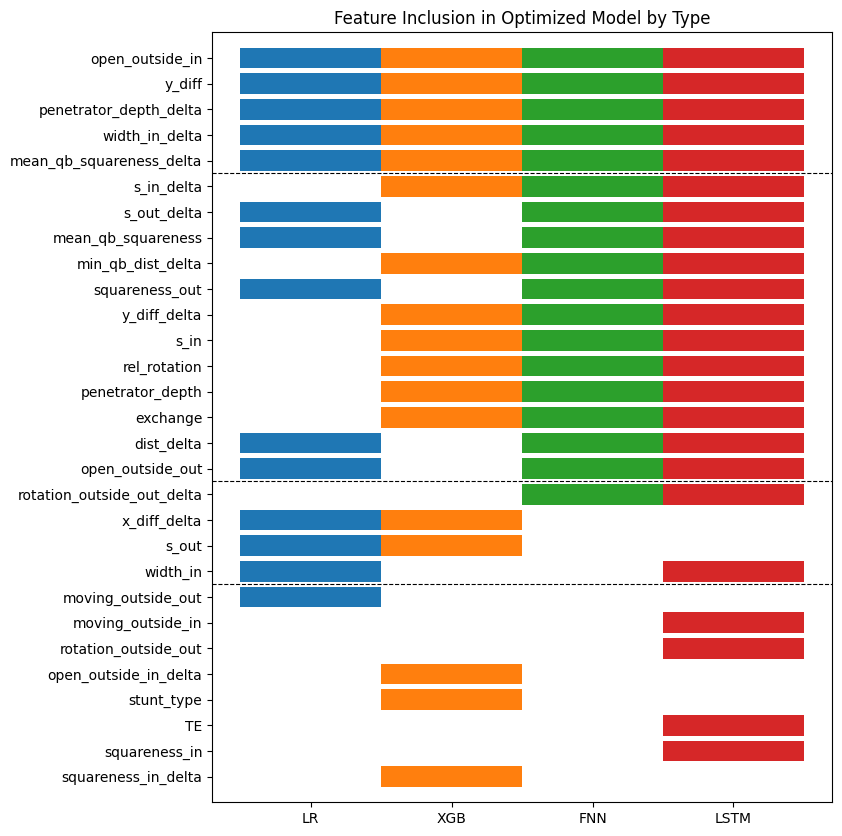

In [13]:
feat_df_short = feature_df[types_upper]
plt.figure(figsize = (8,10))
num_features = len(feature_df)
for left, col in enumerate(feat_df_short):
    plt.barh(feature_df.index, feat_df_short[col], label = col, left = left)
plt.gca().set_xticks(np.arange(0.5,4.0,1),labels = feat_df_short.columns.tolist())
cumcount = 0
for k in total_counts.values[:-1]:
    cumcount += k
    plt.axhline(y = cumcount - 0.5, 
                color = 'black', 
                linestyle = '--', linewidth = 0.8
               )
yvalues = plt.gca().get_yticks()
plt.gca().set_xlim(left = -0.2)
plt.gca().set_ylim(bottom = min(yvalues)-1, top = max(yvalues)+1)
plt.title('Feature Inclusion in Optimized Model by Type')
plt.savefig(os.path.join(plots_dir, 'feature_inclusion_by_model_type.png'), bbox_inches = 'tight')

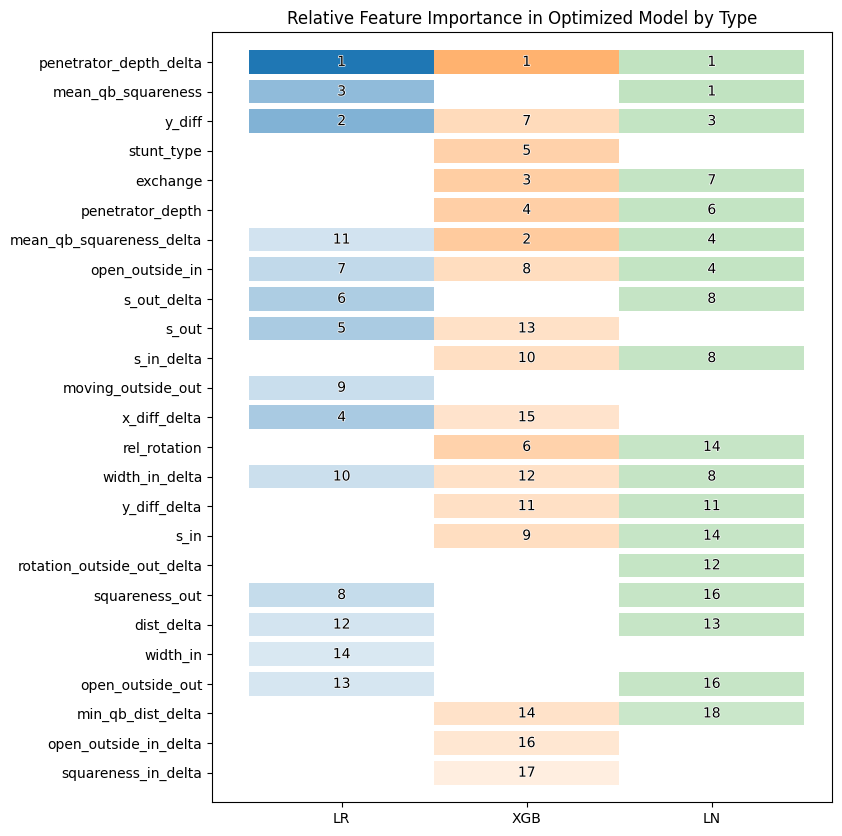

In [14]:
feat_rank_df = feature_df[feature_df['RANK'] > 0.0].sort_values(['RANK','AVG_FI'], ascending = [False, True])
feat_rank_df.rename(columns = {col: col.replace('FNN','LN') for col in feat_rank_df.columns if 'FNN' in col}, 
                    inplace = True)
feat_rank_short = feat_rank_df[types_upper[:2]+['LN']]
plt.figure(figsize = (8,10))
num_features = len(feat_rank_df)
max_rfi = feat_rank_df[[col for col in feat_rank_df if '_FI' in col]].max().max()
for left, col in enumerate(feat_rank_short):
    plt.barh(feat_rank_df.index, feat_rank_short[col], label = col, left = left)
    for i in range(num_features):
        curr_row = feat_rank_df.iloc[i]
        rect = plt.gca().get_children()[2*left*num_features+i]
        rect_alpha = curr_row[col + '_FI'] / max_rfi
        rect.set_alpha(rect_alpha)
        curr_rank = int(curr_row[col + '_RANK'])
        
        text = plt.annotate(str(curr_rank), 
             xy = (left+0.5,
                   float(i)), 
             ha = 'center',
             va = 'center',
             color = 'white',
             zorder = 10
            )
        if curr_rank > 0:
            text.set_color('black')
            text.set_path_effects([PathEffects.withStroke(linewidth = 1, foreground = 'white')])
plt.gca().set_xticks(np.arange(0.5,float(len(feat_rank_short.columns)),1),labels = feat_rank_short.columns.tolist())
yvalues = plt.gca().get_yticks()
plt.gca().set_xlim(left = -0.2)
plt.gca().set_ylim(bottom = min(yvalues)-1, top = max(yvalues)+1)
plt.title('Relative Feature Importance in Optimized Model by Type')
plt.savefig(os.path.join(plots_dir,'rfi_by_model_type.png'), bbox_inches = 'tight')

In [15]:
fname = os.path.join(json_dir, 'fnn_probs.json')
with open(fname, 'r') as openfile:
    probs = json.load(openfile)
pro_frames_merge_trunc['proba'] = probs
preds50 = np.where(pro_frames_merge_trunc['proba'] >= 0.5, 1, 0)
pro_frames_merge_trunc['proba'].mean(), preds50.mean()

(0.47579651953486113, 0.4381306865177833)

In [16]:
fpr, tpr, thresholds = roc_curve(y, probs)
precision_scores = []
neg_precision_scores = []
for threshold in thresholds:
    predictions = np.where(probs >= threshold, 1, 0)
    precision_scores.append(precision_score(y, predictions, zero_division = 1))
    neg_precision_scores.append(precision_score(y, predictions, pos_label = 0, zero_division = 1))

In [17]:
ptdf = pd.DataFrame(list(zip(thresholds, precision_scores, neg_precision_scores)), columns = ['threshold',
                                                                                              'precision',
                                                                                             'neg_precision'])
rush_win_threshold = ptdf[ptdf['precision'] > 0.75].iloc[-1]['threshold']
rush_win_threshold, len([prob for prob in probs if prob >= rush_win_threshold ])

(0.7749322056770325, 1395)

In [18]:
pro_win_threshold = ptdf[ptdf['neg_precision'] > 0.75].iloc[0]['threshold']
pro_win_threshold, len([prob for prob in probs if prob < pro_win_threshold ])

(0.5611286163330078, 17415)

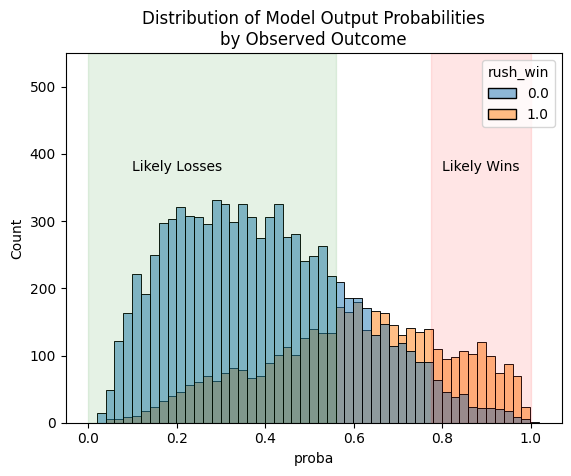

In [21]:
sns.histplot(pro_frames_merge_trunc.query('12 < frame_from_snap < 31'), x = 'proba', hue = 'rush_win', binwidth = 0.02)
plt.gca().set_ylim(ymax = 550)
plt.axvspan(rush_win_threshold, 1.0, alpha = 0.1, color = 'r')
plt.axvspan(0.0, pro_win_threshold, alpha = 0.1, color = 'g')
plt.annotate('Likely Losses', (0.1, 375))
plt.annotate('Likely Wins', (0.8, 375))
plt.title('Distribution of Model Output Probabilities\nby Observed Outcome')
plt.savefig(os.path.join(plots_dir,'proba_dist.png'))

<Axes: xlabel='proba', ylabel='Count'>

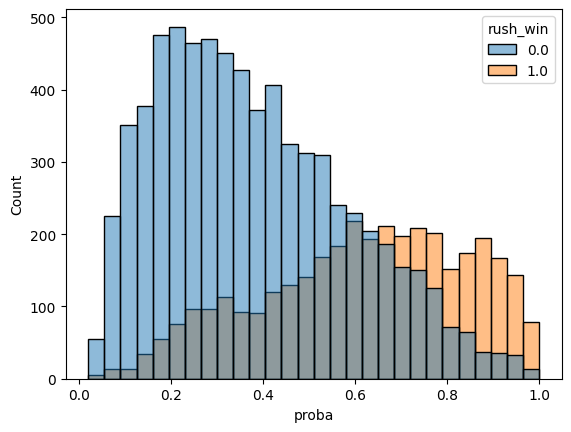

In [22]:
sns.histplot(pro_frames_merge_trunc.query('frame_from_snap > 15'), x = 'proba', hue = 'rush_win')

0.7668918918918919

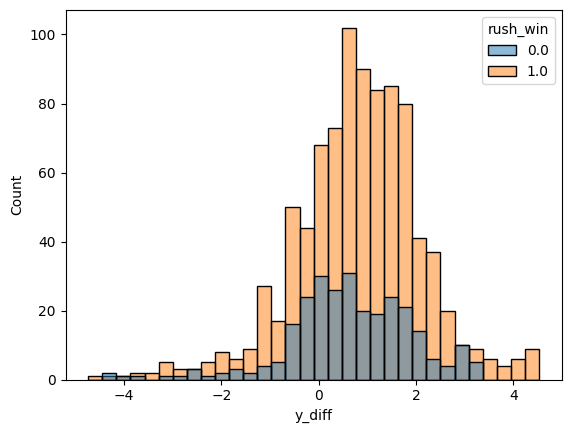

In [23]:
sns.histplot(pro_frames_merge_trunc.query(f'frame_from_snap > 17 & proba > {rush_win_threshold}'), x = 'y_diff', hue = 'rush_win')
dfyd = pro_frames_merge_trunc.query(f'frame_from_snap > 17 & proba > {rush_win_threshold}')
dfyd['rush_win'].mean()

In [24]:
pro_frames_merge_trunc['wl_likely'] = np.where(pro_frames_merge_trunc['proba'] >= rush_win_threshold, 'Likely Win', '')
pro_frames_merge_trunc['wl_likely'] = np.where(pro_frames_merge_trunc['proba'] < pro_win_threshold, 'Likely Loss',
                                              pro_frames_merge_trunc['wl_likely'])
wl_likely_frames = pro_frames_merge_trunc.query("wl_likely != ''").copy()
wl_likely_frames.query('12 < frame_from_snap < 31').value_counts('wl_likely')

wl_likely
Likely Loss    8636
Likely Win     1334
dtype: int64

,losses,wins,penetrator_depth_Pwin,penetrator_depth_Rwin,penetrator_depth_delta_Pwin,penetrator_depth_delta_Rwin
frame_from_snap,,,,,,
1,861,NaN,-0.499663,NaN,0.052009,NaN
2,840,NaN,-0.422357,NaN,0.078821,NaN
3,824,NaN,-0.310983,NaN,0.112633,NaN
4,790,NaN,-0.166785,NaN,0.148443,NaN
5,754,NaN,0.019615,NaN,0.184151,NaN
6,725,NaN,0.238703,NaN,0.216000,NaN
7,691,NaN,0.475210,NaN,0.241375,NaN
8,653,3.0,0.729801,1.710000,0.258469,0.430000
9,633,4.0,1.001975,2.037500,0.269716,0.417500


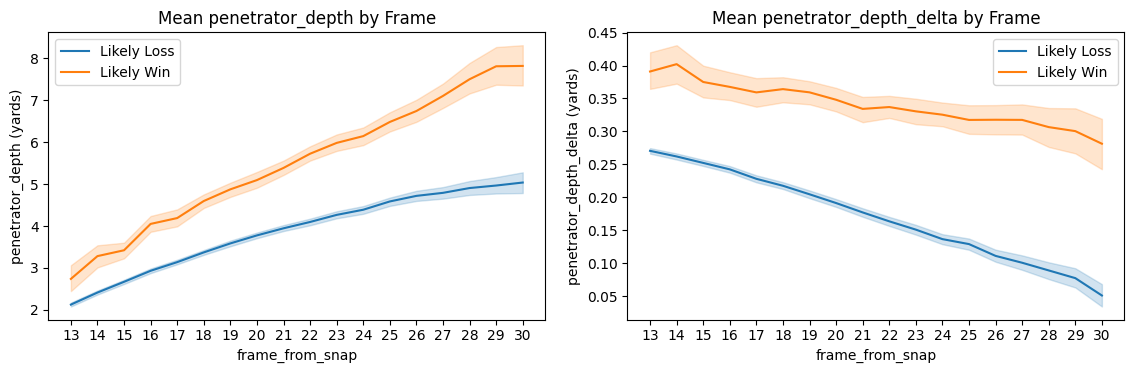

In [25]:
compare_by_feature(data = wl_likely_frames,
                   feature_list = [feat for feat in features2 if feat.startswith('penetrator_')],
                   frame_center = 'frame_from_snap', 
                   units = 'yards',
                   fname = os.path.join(plots_dir,'pen_depth_model_by_snap.png'))

,losses,wins,penetrator_depth_Pwin,penetrator_depth_Rwin,penetrator_depth_delta_Pwin,penetrator_depth_delta_Rwin
frame_from_overlap,,,,,,
-22,32,NaN,-0.606875,NaN,0.043437,NaN
-21,84,NaN,-0.537857,NaN,0.053690,NaN
-20,146,NaN,-0.460753,NaN,0.065685,NaN
-19,212,NaN,-0.437925,NaN,0.076698,NaN
-18,293,NaN,-0.415085,NaN,0.087167,NaN
-17,383,NaN,-0.341671,NaN,0.096632,NaN
-16,486,NaN,-0.283107,NaN,0.108951,NaN
-15,555,NaN,-0.203063,NaN,0.125964,NaN
-14,624,NaN,-0.113654,NaN,0.143189,NaN


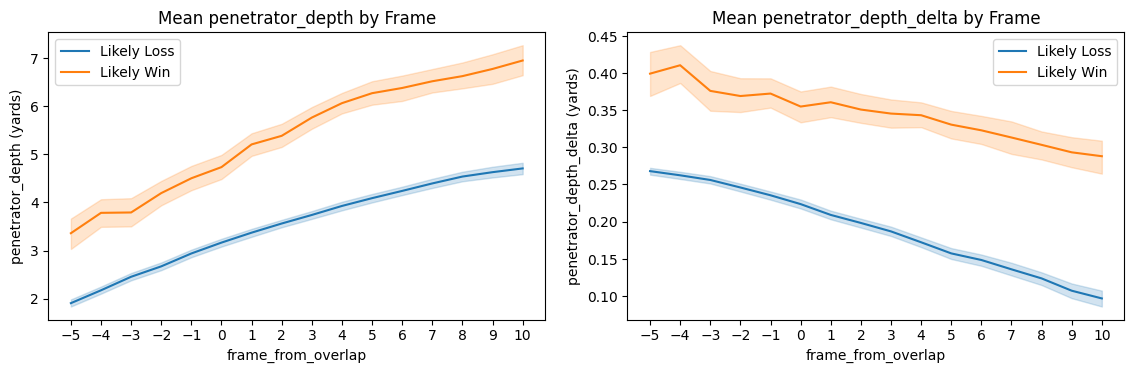

In [26]:
compare_by_feature(data = wl_likely_frames,
                   feature_list = [feat for feat in features2 if feat.startswith('penetrator_')],
                   frame_center = 'frame_from_overlap', 
                   units = 'yards',
                   fname = os.path.join(plots_dir,'pen_depth_model_by_overlap.png'))

,losses,wins,mean_qb_squareness_Pwin,mean_qb_squareness_Rwin,mean_qb_squareness_delta_Pwin,mean_qb_squareness_delta_Rwin
frame_from_snap,,,,,,
1,861,NaN,28.555070,NaN,-0.555812,NaN
2,840,NaN,27.598052,NaN,-0.678418,NaN
3,824,NaN,27.155356,NaN,-0.497903,NaN
4,790,NaN,26.777546,NaN,-0.467202,NaN
5,754,NaN,26.145513,NaN,-0.320745,NaN
6,725,NaN,25.996821,NaN,-0.245568,NaN
7,691,NaN,25.701206,NaN,-0.073398,NaN
8,653,3.0,25.716549,38.108784,0.148738,-0.135151
9,633,4.0,26.009465,55.797373,0.171760,5.864186


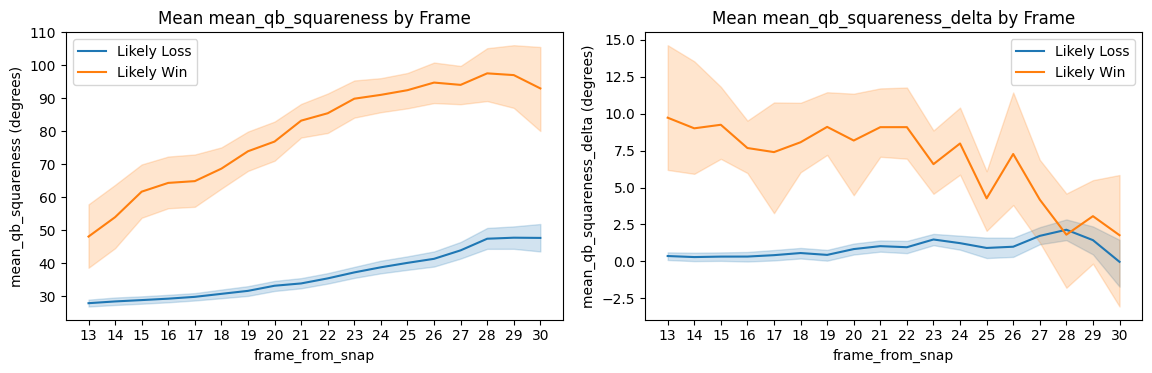

In [27]:
compare_by_feature(data = wl_likely_frames,
                   feature_list = [feat for feat in features2 if feat.startswith('mean_qb_')],
                   frame_center = 'frame_from_snap', 
                   units = 'degrees',
                   fname = os.path.join(plots_dir,'mqs_model_by_snap.png'))

,losses,wins,y_diff_Pwin,y_diff_Rwin,y_diff_delta_Pwin,y_diff_delta_Rwin
frame_from_snap,,,,,,
1,861,NaN,0.420430,NaN,-6.747967e-03,NaN
2,840,NaN,0.416060,NaN,-6.809524e-03,NaN
3,824,NaN,0.407257,NaN,-6.055825e-03,NaN
4,790,NaN,0.397899,NaN,-8.000000e-03,NaN
5,754,NaN,0.384615,NaN,-9.098143e-03,NaN
6,725,NaN,0.369876,NaN,-1.252414e-02,NaN
7,691,NaN,0.350535,NaN,-1.558611e-02,NaN
8,653,3.0,0.323430,0.863333,-2.027565e-02,0.080000
9,633,4.0,0.298057,1.010000,-2.208531e-02,0.055000


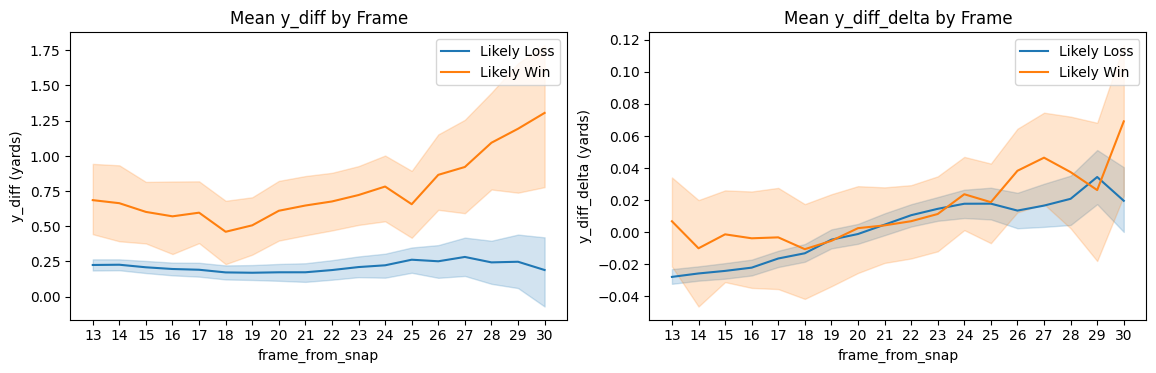

In [28]:
compare_by_feature(data = wl_likely_frames,
                   feature_list = [feat for feat in features2 if feat.startswith('y_diff')],
                   frame_center = 'frame_from_snap', 
                   units = 'yards',
                   fname = os.path.join(plots_dir,'y_diff_model_by_snap.png'))

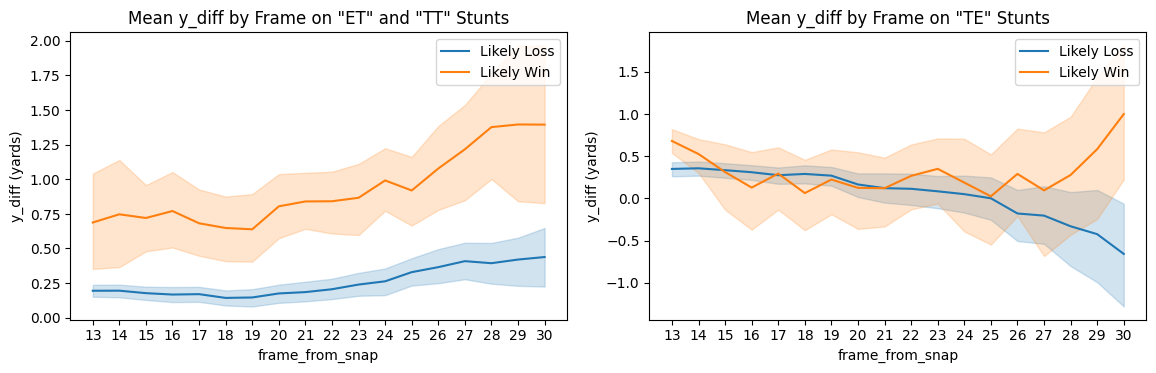

In [29]:
qstrings = ["stunt_type != 'TE'", "stunt_type == 'TE'"]
titles = ['Mean y_diff by Frame on "ET" and "TT" Stunts',
          'Mean y_diff by Frame on "TE" Stunts']
fig, axs = plt.subplots(1,2,sharex = True)
plt.xticks(np.arange(13,31))
fig.set_figwidth(12)
fig.set_figheight(4)
fig.tight_layout(pad = 3.0)
feature = 'y_diff'
data_trunc = wl_likely_frames.query('12 < frame_from_snap < 31')
for dex, qstring in enumerate(qstrings):
    data = data_trunc.query(qstring)
    lines = sns.lineplot(
            ax = axs[dex],
            data = data,
            x = 'frame_from_snap',
            y = feature,
            hue = 'wl_likely')
    lines.set(title = titles[dex])
    units = 'yards'
    if len(units) > 0:
        y_label = feature + f' ({units})'
        lines.set(ylabel = y_label)
    axs[dex].legend(title = '')
plt.savefig(os.path.join(plots_dir,'y_diff_model_by_stunt_type.png'))

wl_likely
Likely Loss    0.713267
Likely Win     0.566502
Name: exchange, dtype: float64

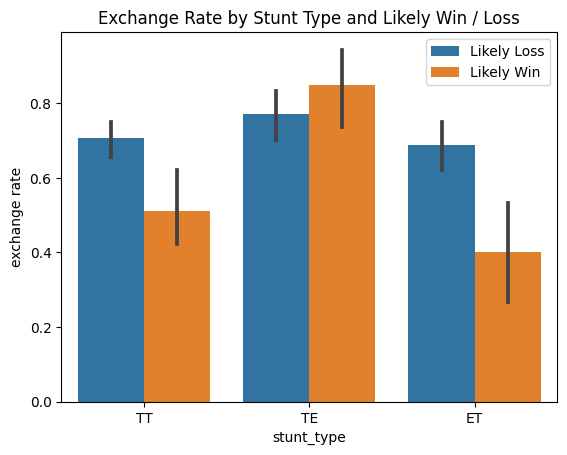

In [30]:
wl_likely_frames['last_frame'] = wl_likely_frames.groupby(['gameId', 'playId', 'stuntId'])['frameId'].transform(max)
last_frames = wl_likely_frames.query('frameId == last_frame').sort_values('wl_likely').copy()
last_frames['stunt_type'] = last_frames['stunt_type'].astype('object')
sns.barplot(last_frames, x = 'stunt_type', y = 'exchange', hue = 'wl_likely')
plt.legend(title = '')
plt.gca().set_ylabel('exchange rate')
plt.title('Exchange Rate by Stunt Type and Likely Win / Loss')
plt.savefig(os.path.join(plots_dir,'exchange_model.png'))
last_frames.groupby('wl_likely')['exchange'].mean()

,losses,wins,s_in_Pwin,s_in_Rwin,s_out_Pwin,s_out_Rwin,s_in_delta_Pwin,s_in_delta_Rwin,s_out_delta_Pwin,s_out_delta_Rwin
frame_from_snap,,,,,,,,,,
1,861,NaN,0.405192,NaN,0.317875,NaN,0.149652,NaN,0.145877,NaN
2,840,NaN,0.584321,NaN,0.499202,NaN,0.175179,NaN,0.187071,NaN
3,824,NaN,0.776092,NaN,0.706371,NaN,0.186675,NaN,0.210158,NaN
4,790,NaN,0.980367,NaN,0.908038,NaN,0.195038,NaN,0.211354,NaN
5,754,NaN,1.169854,NaN,1.100159,NaN,0.188448,NaN,0.201273,NaN
6,725,NaN,1.365793,NaN,1.272345,NaN,0.182097,NaN,0.175531,NaN
7,691,NaN,1.528538,NaN,1.411100,NaN,0.167077,NaN,0.148162,NaN
8,653,3.0,1.672496,1.730000,1.511776,2.586667,0.149556,0.043333,0.122083,0.190000
9,633,4.0,1.786130,2.020000,1.610032,2.487500,0.130142,0.052500,0.099810,0.075000


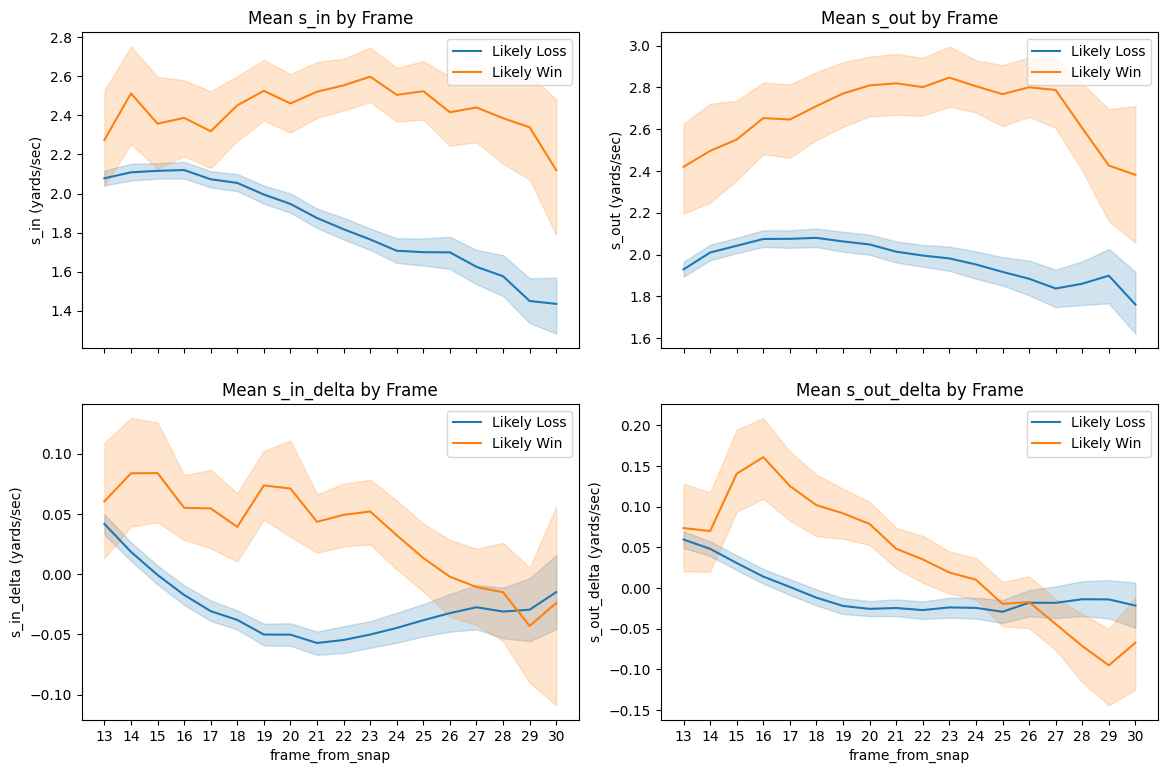

In [31]:
compare_by_feature(data = wl_likely_frames,
                   feature_list = [feat for feat in features2 if feat.startswith('s_')],
                   frame_center = 'frame_from_snap', 
                   units = 'yards/sec',
                   fname = os.path.join(plots_dir,'speed_model_by_snap.png')
                  )

In [36]:
with open(os.path.join(json_dir,'lstm_probs.json'), 'r') as openfile:
    probs = json.load(openfile)
pro_frames_merge_trunc['proba'] = probs
pro_frames_merge_trunc['stunt_type'] = pro_frames_merge_trunc['stunt_type'].astype('object')
player_map = pd.read_csv('../../data/players.csv', index_col = 0)['displayName']
pro_frames_merge_trunc['last_frame'] = pro_frames_merge_trunc.groupby(['gameId', 'playId', 'stuntId'])['frame_from_snap'].transform(max)
last_frames = pro_frames_merge_trunc.query('frame_from_snap == last_frame').copy()
roc_auc_score(last_frames['rush_win'], last_frames['proba'])

0.7853954858573104

In [37]:
fpr, tpr, thresholds = roc_curve(last_frames['rush_win'], last_frames['proba'])
f1_scores = []
for threshold in thresholds:
    predictions = np.where(last_frames['proba'] >= threshold, 1, 0)
    f1_scores.append(f1_score(last_frames['rush_win'], predictions, zero_division = 0))
f1df = pd.DataFrame(list(zip(thresholds, f1_scores)), columns = ['threshold', 'f1'])

In [38]:
f1df_sorted = f1df.sort_values('f1', ascending = False).head()
f1df_sorted

,threshold,f1
151,0.523373,0.635220
149,0.525004,0.635071
147,0.527753,0.633914
159,0.489698,0.633484
137,0.569425,0.633333


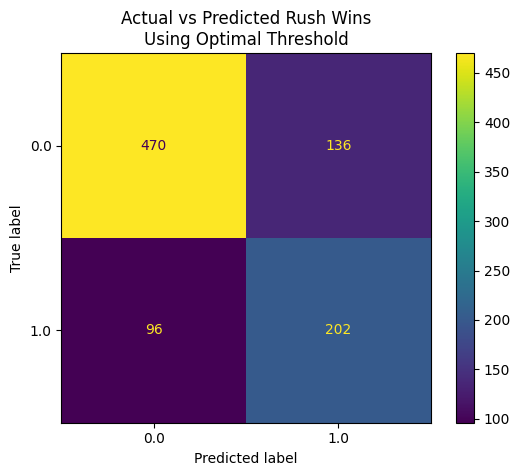

In [39]:
last_frames['pred'] = np.where(last_frames['proba'] >= f1df_sorted.iloc[0]['threshold'], 1, 0)
ConfusionMatrixDisplay.from_predictions(last_frames['rush_win'],last_frames['pred'])
plt.title('Actual vs Predicted Rush Wins\nUsing Optimal Threshold')
plt.savefig(os.path.join(plots_dir,'confusion_matrix.png'))

In [40]:
# Protection combos
group_cols = ['nflId_in', 'position_in', 'nflId_out', 'position_out', 'team']
best_scores = last_frames.groupby(group_cols)['proba'].describe()
best_scores = best_scores[best_scores['count'] >= 5][best_scores.columns.values[:2]]
best_scores['win_rate_exp'] = last_frames.groupby(group_cols)['pred'].mean()
best_scores['win_rate_act'] = last_frames.groupby(group_cols)['rush_win'].mean()
best_scores['win_rate_below_exp'] = best_scores['win_rate_exp'] - best_scores['win_rate_act']
best_scores = best_scores.reset_index()
best_scores['player_in'] = best_scores['nflId_in'].map(player_map)
best_scores['player_out'] = best_scores['nflId_out'].map(player_map)
best_scores.rename(columns = {'mean': 'mean_proba'}, inplace = True)
bs_disp = best_scores[['player_in', 'position_in', 'player_out', 'position_out','team', 'count', 
             'mean_proba', 'win_rate_exp', 'win_rate_act', 'win_rate_below_exp']].sort_values(['win_rate_exp','mean_proba'])
bs_disp

,player_in,position_in,player_out,position_out,team,count,mean_proba,win_rate_exp,win_rate_act,win_rate_below_exp
51,Andre James,C,John Simpson,G,LV,7.0,0.172977,0.000000,0.142857,-0.142857
15,Ali Marpet,G,Donovan Smith,T,TB,8.0,0.204209,0.000000,0.125000,-0.125000
9,Trey Hopkins,C,Quinton Spain,G,CIN,6.0,0.242197,0.000000,0.333333,-0.333333
40,Bradley Bozeman,C,Ben Powers,G,BAL,5.0,0.242506,0.000000,0.000000,0.000000
65,Creed Humphrey,C,Trey Smith,G,KC,7.0,0.259482,0.000000,0.285714,-0.285714
...,...,...,...,...,...,...,...,...,...,...
56,Matt Hennessy,C,Jalen Mayfield,G,ATL,6.0,0.613503,0.666667,0.500000,0.166667
48,Olisaemeka Udoh,G,Brian O'Neill,T,MIN,7.0,0.600777,0.714286,0.571429,0.142857
7,Joel Bitonio,G,Jedrick Wills,T,CLE,5.0,0.598496,0.800000,0.200000,0.600000
8,Trai Turner,G,Chukwuma Okorafor,T,PIT,5.0,0.652755,0.800000,0.400000,0.400000


In [29]:
''.join(bs_disp[:10].to_html().split(sep = '\n'))

'<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>player_in</th>      <th>position_in</th>      <th>player_out</th>      <th>position_out</th>      <th>team</th>      <th>count</th>      <th>mean_proba</th>      <th>win_rate_exp</th>      <th>win_rate_act</th>      <th>win_rate_below_exp</th>    </tr>  </thead>  <tbody>    <tr>      <th>51</th>      <td>Andre James</td>      <td>C</td>      <td>John Simpson</td>      <td>G</td>      <td>LV</td>      <td>7.0</td>      <td>0.172977</td>      <td>0.000000</td>      <td>0.142857</td>      <td>-0.142857</td>    </tr>    <tr>      <th>15</th>      <td>Ali Marpet</td>      <td>G</td>      <td>Donovan Smith</td>      <td>T</td>      <td>TB</td>      <td>8.0</td>      <td>0.204209</td>      <td>0.000000</td>      <td>0.125000</td>      <td>-0.125000</td>    </tr>    <tr>      <th>9</th>      <td>Trey Hopkins</td>      <td>C</td>      <td>Quinton Spain</td>      <td>G</td>      <td>CIN</td>

In [30]:
''.join(bs_disp[-10:].to_html().split(sep = '\n'))

'<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>player_in</th>      <th>position_in</th>      <th>player_out</th>      <th>position_out</th>      <th>team</th>      <th>count</th>      <th>mean_proba</th>      <th>win_rate_exp</th>      <th>win_rate_act</th>      <th>win_rate_below_exp</th>    </tr>  </thead>  <tbody>    <tr>      <th>34</th>      <td>Will Hernandez</td>      <td>G</td>      <td>Matt Peart</td>      <td>T</td>      <td>NYG</td>      <td>5.0</td>      <td>0.518651</td>      <td>0.600000</td>      <td>0.200000</td>      <td>0.400000</td>    </tr>    <tr>      <th>52</th>      <td>Cesar Ruiz</td>      <td>C</td>      <td>Calvin Throckmorton</td>      <td>G</td>      <td>NO</td>      <td>5.0</td>      <td>0.538397</td>      <td>0.600000</td>      <td>0.200000</td>      <td>0.400000</td>    </tr>    <tr>      <th>45</th>      <td>Tytus Howard</td>      <td>G</td>      <td>Laremy Tunsil</td>      <td>T</td>      <td>H

In [41]:
# Individual performance assuming equal blame
last_frames_in = last_frames[['nflId_in', 'position_in', 'team', 'rush_win','proba', 'pred']].copy()
last_frames_in.rename(columns = {'nflId_in': 'nflId', 'position_in': 'position'}, inplace = True)
last_frames_out = last_frames[['nflId_out', 'position_out', 'team', 'rush_win','proba', 'pred']].copy()
last_frames_out.rename(columns = {'nflId_out': 'nflId', 'position_out': 'position'}, inplace = True)
last_frames_solo = pd.concat((last_frames_in, last_frames_out))
best_scores_solo = last_frames_solo[['nflId', 'position', 'team']].drop_duplicates().set_index('nflId')
best_scores_solo['count'] = last_frames_solo.groupby('nflId')['proba'].count()
best_scores_solo['mean_proba'] = last_frames_solo.groupby('nflId')['proba'].mean()
best_scores_solo['win_rate_exp'] = last_frames_solo.groupby('nflId')['pred'].mean()
best_scores_solo['win_rate_act'] = last_frames_solo.groupby('nflId')['rush_win'].mean()
best_scores_solo['win_rate_below_exp'] = best_scores_solo['win_rate_exp'] - best_scores_solo['win_rate_act']
best_scores_solo.reset_index(inplace = True)
best_scores_solo['player'] = best_scores_solo['nflId'].map(player_map)
best_scores_solo = best_scores_solo.query('count >= 5')
bss_disp = best_scores_solo[['player', 'position', 'team', 'count', 'mean_proba',
                  'win_rate_exp', 'win_rate_act', 'win_rate_below_exp']].sort_values(['win_rate_exp', 'mean_proba'])
bss_disp

,player,position,team,count,mean_proba,win_rate_exp,win_rate_act,win_rate_below_exp
5,Brandon Brooks,G,PHI,5,0.133654,0.000000,0.000000,0.000000
110,Ted Karras,G,NE,7,0.197829,0.000000,0.142857,-0.142857
139,Donovan Smith,T,TB,8,0.204209,0.000000,0.125000,-0.125000
119,Trey Smith,G,KC,10,0.253931,0.000000,0.300000,-0.300000
48,Michael Deiter,C,MIA,8,0.305257,0.000000,0.125000,-0.125000
...,...,...,...,...,...,...,...,...
32,Kyle Fuller,C,SEA,9,0.630153,0.777778,0.666667,0.111111
193,Jedrick Wills,T,CLE,5,0.598496,0.800000,0.200000,0.600000
128,Jamarco Jones,G,SEA,5,0.643065,0.800000,0.400000,0.400000
204,Jamarco Jones,T,SEA,5,0.643065,0.800000,0.400000,0.400000


In [32]:
''.join(bss_disp[:5].to_html().split(sep = '\n'))

'<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>player</th>      <th>position</th>      <th>team</th>      <th>count</th>      <th>mean_proba</th>      <th>win_rate_exp</th>      <th>win_rate_act</th>      <th>win_rate_below_exp</th>    </tr>  </thead>  <tbody>    <tr>      <th>5</th>      <td>Brandon Brooks</td>      <td>G</td>      <td>PHI</td>      <td>5</td>      <td>0.133654</td>      <td>0.0</td>      <td>0.000000</td>      <td>0.000000</td>    </tr>    <tr>      <th>110</th>      <td>Ted Karras</td>      <td>G</td>      <td>NE</td>      <td>7</td>      <td>0.197829</td>      <td>0.0</td>      <td>0.142857</td>      <td>-0.142857</td>    </tr>    <tr>      <th>139</th>      <td>Donovan Smith</td>      <td>T</td>      <td>TB</td>      <td>8</td>      <td>0.204209</td>      <td>0.0</td>      <td>0.125000</td>      <td>-0.125000</td>    </tr>    <tr>      <th>119</th>      <td>Trey Smith</td>      <td>G</td>      <td>KC</td> 

In [33]:
''.join(bss_disp[-5:].to_html().split(sep = '\n'))

'<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>player</th>      <th>position</th>      <th>team</th>      <th>count</th>      <th>mean_proba</th>      <th>win_rate_exp</th>      <th>win_rate_act</th>      <th>win_rate_below_exp</th>    </tr>  </thead>  <tbody>    <tr>      <th>32</th>      <td>Kyle Fuller</td>      <td>C</td>      <td>SEA</td>      <td>9</td>      <td>0.630153</td>      <td>0.777778</td>      <td>0.666667</td>      <td>0.111111</td>    </tr>    <tr>      <th>193</th>      <td>Jedrick Wills</td>      <td>T</td>      <td>CLE</td>      <td>5</td>      <td>0.598496</td>      <td>0.800000</td>      <td>0.200000</td>      <td>0.600000</td>    </tr>    <tr>      <th>128</th>      <td>Jamarco Jones</td>      <td>G</td>      <td>SEA</td>      <td>5</td>      <td>0.643065</td>      <td>0.800000</td>      <td>0.400000</td>      <td>0.400000</td>    </tr>    <tr>      <th>204</th>      <td>Jamarco Jones</td>      <td>T</td

In [42]:
# Team performance
best_frames_team = last_frames.groupby('team')['gameId'].count().rename('count').to_frame()
best_frames_team[['mean_proba', 'win_rate_exp', 'win_rate_act']] = last_frames.groupby('team')[['proba',
                                                                                                'pred','rush_win']].mean()
best_frames_team['win_rate_below_exp'] = best_frames_team['win_rate_exp'] - best_frames_team['win_rate_act']
bft_disp = best_frames_team.sort_values(['win_rate_exp', 'mean_proba'])
bft_disp

,count,mean_proba,win_rate_exp,win_rate_act,win_rate_below_exp
team,,,,,
KC,30,0.347607,0.200000,0.266667,-0.066667
PHI,21,0.342927,0.238095,0.285714,-0.047619
LV,40,0.347954,0.250000,0.250000,0.000000
BUF,18,0.441171,0.277778,0.611111,-0.333333
MIA,25,0.397591,0.280000,0.240000,0.040000
CHI,21,0.323248,0.285714,0.333333,-0.047619
DEN,38,0.416772,0.289474,0.342105,-0.052632
NYG,50,0.444266,0.300000,0.220000,0.080000
BAL,13,0.377172,0.307692,0.230769,0.076923


In [35]:
''.join(bft_disp[:5].to_html().split(sep = '\n'))

'<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>count</th>      <th>mean_proba</th>      <th>win_rate_exp</th>      <th>win_rate_act</th>      <th>win_rate_below_exp</th>    </tr>    <tr>      <th>team</th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>    </tr>  </thead>  <tbody>    <tr>      <th>KC</th>      <td>30</td>      <td>0.347607</td>      <td>0.200000</td>      <td>0.266667</td>      <td>-0.066667</td>    </tr>    <tr>      <th>PHI</th>      <td>21</td>      <td>0.342927</td>      <td>0.238095</td>      <td>0.285714</td>      <td>-0.047619</td>    </tr>    <tr>      <th>LV</th>      <td>40</td>      <td>0.347954</td>      <td>0.250000</td>      <td>0.250000</td>      <td>0.000000</td>    </tr>    <tr>      <th>BUF</th>      <td>18</td>      <td>0.441171</td>      <td>0.277778</td>      <td>0.611111</td>      <td>-0.333333</td>    </tr>    <tr>      <th>MIA</th>      <td>25</td>      <td>0.3

In [36]:
''.join(bft_disp[-5:].to_html().split(sep = '\n'))

'<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>count</th>      <th>mean_proba</th>      <th>win_rate_exp</th>      <th>win_rate_act</th>      <th>win_rate_below_exp</th>    </tr>    <tr>      <th>team</th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>    </tr>  </thead>  <tbody>    <tr>      <th>MIN</th>      <td>28</td>      <td>0.498148</td>      <td>0.500000</td>      <td>0.500000</td>      <td>0.000000</td>    </tr>    <tr>      <th>CAR</th>      <td>22</td>      <td>0.543320</td>      <td>0.500000</td>      <td>0.454545</td>      <td>0.045455</td>    </tr>    <tr>      <th>TEN</th>      <td>19</td>      <td>0.471435</td>      <td>0.526316</td>      <td>0.368421</td>      <td>0.157895</td>    </tr>    <tr>      <th>CLE</th>      <td>30</td>      <td>0.516289</td>      <td>0.566667</td>      <td>0.300000</td>      <td>0.266667</td>    </tr>    <tr>      <th>SEA</th>      <td>20</td>      <td>0.51

In [43]:
def get_team_pairs(team_abbr, last_frames):
    group_cols = ['nflId_in', 'pff_positionLinedUp_in', 'nflId_out', 'pff_positionLinedUp_out', 'team']
    best_scores = last_frames.groupby(group_cols)['proba'].describe()
    best_scores = best_scores[best_scores.columns.values[:2]]
    best_scores['win_rate_exp'] = last_frames.groupby(group_cols)['pred'].mean()
    best_scores['win_rate_act'] = last_frames.groupby(group_cols)['rush_win'].mean()
    best_scores['win_rate_below_exp'] = best_scores['win_rate_exp'] - best_scores['win_rate_act']
    best_scores = best_scores.reset_index()
    best_scores = best_scores[best_scores['team'] == team_abbr]
    best_scores['player_in'] = best_scores['nflId_in'].map(player_map)
    best_scores['player_out'] = best_scores['nflId_out'].map(player_map)
    best_scores.rename(columns = {'mean': 'mean_proba'}, inplace = True)
    bs_disp = best_scores[['player_in', 'nflId_in','pff_positionLinedUp_in', 
                           'player_out', 'nflId_out','pff_positionLinedUp_out',
                           'team', 'count', 'mean_proba', 'win_rate_exp',
                           'win_rate_act', 'win_rate_below_exp']
                         ].sort_values(['win_rate_exp','mean_proba'],ascending = [False, False])
    return bs_disp.rename(columns = {'pff_positionLinedUp_in': 'pos_in', 'pff_positionLinedUp_out': 'pos_out'})
def get_pair_reps(pair):
    qstring = 'nflId_in == {} & nflId_out == {}'.format(pair['nflId_in'], pair['nflId_out'])
    reps = last_frames.query(qstring).copy()
    reps['player_in'] = player_map[pair['nflId_in']]
    reps['player_out'] = player_map[pair['nflId_out']]
    cols = ['gameId', 'playId', 'stuntId', 'player_in', 'pff_positionLinedUp_in', 'player_out', 
                  'pff_positionLinedUp_out', 'team', 'stunt_type', 'exchange', 'proba', 'pred', 'rush_win']
    return reps[cols].rename(columns = {'pff_positionLinedUp_in': 'pos_in', 
                                        'pff_positionLinedUp_out': 'pos_out'})
def get_pair_summary(pair_reps):
    pair_groupby = pair_reps.groupby('stunt_type')
    pair_count = pair_groupby['gameId'].count().rename('count')
    pair_summary = pair_groupby[['proba', 'pred', 'rush_win']].mean()
    pair_summary.columns = ['mean_proba', 'win_rate_exp', 'win_rate_act']
    pair_summary['win_rate_below_exp'] = pair_summary['win_rate_exp'] - pair_summary['win_rate_act']
    return pd.concat((pair_count,pair_summary), axis = 1)
def get_rep_frames(data, reps, features):
    rep_frames = data[(data['gameId'].isin(reps['gameId'])) &
                      (data['playId'].isin(reps['playId'])) &
                      (data['stuntId'].isin(reps['stuntId']))] 
    cols = ['gameId', 'playId', 'stuntId', 'frame_from_snap'] + features + ['proba', 'rush_win']
    return rep_frames[cols]
def get_win_rates_gt(data, stunt_type, frame, frame_center, feature, bound = 0.5):
    frame_df = data[(data['stunt_type'] == stunt_type) &
                    (data[frame_center] == frame)]
    feat_series = frame_df[[feature,'rush_win']]
    feat_series = feat_series.set_index(feature).sort_index().squeeze()
    rates = [(feat_series.index[i], feat_series.iloc[i:].mean()) for i in range(len(feat_series)) 
            if feat_series.iloc[i:].mean() >= bound]
    return rates
def get_win_rates_lt(data, stunt_type, frame, frame_center, feature, bound = 0.5):
    frame_df = data[(data['stunt_type'] == stunt_type) &
                    (data[frame_center] == frame)]
    feat_series = frame_df[[feature,'rush_win']]
    feat_series = feat_series.set_index(feature).sort_index().squeeze()
    rates = [(feat_series.index[i], feat_series.iloc[:i].mean()) for i in range(len(feat_series)) 
            if feat_series.iloc[i:].mean() < bound]
    return rates
def get_feature_threshold_df(data, frame_center, stunt_type, features):
    threshold_lists = [] 
    for frame in data[frame_center].unique():
        thresholds = []
        for feature in features: 
            rates = get_win_rates_gt(data, stunt_type, frame, frame_center, feature)
            if len(rates) > 0:
                threshold = rates[0][0]
            else:
                threshold = np.NaN
            thresholds.append(threshold)
        threshold_lists.append(thresholds)
    threshold_df = pd.DataFrame(threshold_lists, columns = features, index = data[frame_center].unique())    
    return threshold_df
def get_over_threshold_rates(rep_frames, threshold_df):
    masks = []
    for _,group in rep_frames.groupby(['gameId', 'playId', 'stuntId']):
        frame_count = group['frame_from_snap'].max()
        comp_df = group[threshold_df.columns.values].set_index(group['frame_from_snap'])
        binary_mask = np.where(comp_df > threshold_df.iloc[:frame_count], 1.0, 0.0)
        masks.append(binary_mask)
    mask_len = [mask.shape[0] for mask in masks]
    max_len = max(mask_len)
    for i, mask in enumerate(masks):
        if mask.shape[0] < max_len:
            masks[i] = np.concatenate((mask,np.zeros((max_len-mask.shape[0],mask.shape[1]))))
    cum_mask = np.array(masks).sum(axis = 0)
    vector = np.array([np.concatenate((np.ones(count), np.zeros(max_len-count))) for count in mask_len]).sum(axis = 0)
    over_threshold_rates = pd.DataFrame(cum_mask / vector[:,None], columns = threshold_df.columns)
    over_threshold_rates = pd.concat((pd.Series(vector, name = 'count'), over_threshold_rates), axis = 1)
    return over_threshold_rates.set_index(np.arange(1,max_len+1))
def plot_otrs(otr_df, feature, bound = 0.5):
    y1 = otr_df[feature]
    sns.lineplot(y1)
    plt.axhline(y = bound, linestyle = '--', color = 'black')
    plt.title(feature)
    plt.gca().set_ylabel('Over Threshold Rate')
    plt.gca().set_xlabel('frame_from_snap')
    plt.gca().set_ylim(ymax = 1.0)
    plt.fill_between(x = y1.index, 
                     y1 = y1,
                     where = y1 >= 0.5)
features_of_interest = ['penetrator_depth', 'penetrator_depth_delta',
            'mean_qb_squareness', 'mean_qb_squareness_delta',
            'squareness_in', 'squareness_out',
            'open_outside_in', 'open_outside_out',
            'y_diff', 's_in', 's_out']

In [44]:
den_pairs = get_team_pairs('DEN', last_frames)   
den_pairs

,player_in,nflId_in,pos_in,player_out,nflId_out,pos_out,team,count,mean_proba,win_rate_exp,win_rate_act,win_rate_below_exp
222,Lloyd Cushenberry,52491.0,C,Quinn Meinerz,53527.0,LG,DEN,1.0,0.739397,1.000000,0.000000,1.000000
220,Lloyd Cushenberry,52491.0,C,Dalton Risner,47824.0,LG,DEN,7.0,0.425620,0.428571,0.285714,0.142857
181,Dalton Risner,47824.0,LG,Garett Bolles,44832.0,LT,DEN,5.0,0.476174,0.400000,0.200000,0.200000
107,Graham Glasgow,43384.0,RG,Bobby Massie,38642.0,RT,DEN,10.0,0.381573,0.300000,0.500000,-0.200000
221,Lloyd Cushenberry,52491.0,C,Netane Muti,52589.0,RG,DEN,4.0,0.482076,0.250000,0.500000,-0.250000
219,Lloyd Cushenberry,52491.0,C,Graham Glasgow,43384.0,RG,DEN,8.0,0.387180,0.125000,0.375000,-0.250000
264,Quinn Meinerz,53527.0,LG,Garett Bolles,44832.0,LT,DEN,1.0,0.408734,0.000000,0.000000,0.000000
236,Netane Muti,52589.0,RG,Bobby Massie,38642.0,RT,DEN,1.0,0.366985,0.000000,0.000000,0.000000
218,Lloyd Cushenberry,52491.0,C,Bobby Massie,38642.0,RT,DEN,1.0,0.120528,0.000000,0.000000,0.000000


In [151]:
''.join(den_pairs.set_index(np.arange(1,len(den_pairs)+1)).to_html().split(sep = '\n'))

'<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>player_in</th>      <th>nflId_in</th>      <th>pos_in</th>      <th>player_out</th>      <th>nflId_out</th>      <th>pos_out</th>      <th>team</th>      <th>count</th>      <th>mean_proba</th>      <th>win_rate_exp</th>      <th>win_rate_act</th>      <th>win_rate_below_exp</th>    </tr>  </thead>  <tbody>    <tr>      <th>1</th>      <td>Lloyd Cushenberry</td>      <td>52491.0</td>      <td>C</td>      <td>Quinn Meinerz</td>      <td>53527.0</td>      <td>LG</td>      <td>DEN</td>      <td>1.0</td>      <td>0.739397</td>      <td>1.000000</td>      <td>0.000000</td>      <td>1.000000</td>    </tr>    <tr>      <th>2</th>      <td>Lloyd Cushenberry</td>      <td>52491.0</td>      <td>C</td>      <td>Dalton Risner</td>      <td>47824.0</td>      <td>LG</td>      <td>DEN</td>      <td>7.0</td>      <td>0.425620</td>      <td>0.428571</td>      <td>0.285714</td>      <td>0.142857</td

In [45]:
rgt_reps = get_pair_reps(den_pairs.loc[107])
rgt_reps

,gameId,playId,stuntId,player_in,pos_in,player_out,pos_out,team,stunt_type,exchange,proba,pred,rush_win
4049,2021091212,702,1.0,Graham Glasgow,RG,Bobby Massie,RT,DEN,ET,1,0.080456,0,0.0
4169,2021091212,3181,1.0,Graham Glasgow,RG,Bobby Massie,RT,DEN,TE,1,0.087262,0,1.0
24301,2021101709,374,1.0,Graham Glasgow,RG,Bobby Massie,RT,DEN,TE,1,0.659949,1,1.0
24566,2021101709,2502,1.0,Graham Glasgow,RG,Bobby Massie,RT,DEN,TE,1,0.184090,0,0.0
24663,2021101709,3134,1.0,Graham Glasgow,RG,Bobby Massie,RT,DEN,TE,1,0.880401,1,1.0
24693,2021101709,3248,1.0,Graham Glasgow,RG,Bobby Massie,RT,DEN,ET,1,0.419034,0,0.0
24781,2021101709,4063,1.0,Graham Glasgow,RG,Bobby Massie,RT,DEN,ET,1,0.131873,0,0.0
24837,2021101709,4111,1.0,Graham Glasgow,RG,Bobby Massie,RT,DEN,TE,1,0.599247,1,1.0
25895,2021102100,1205,1.0,Graham Glasgow,RG,Bobby Massie,RT,DEN,TE,1,0.308676,0,0.0
26052,2021102100,2106,1.0,Graham Glasgow,RG,Bobby Massie,RT,DEN,ET,0,0.464745,0,1.0


In [46]:
''.join(rgt_reps.set_index(np.arange(1,len(rgt_reps)+1)).to_html().split(sep = '\n'))

'<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>gameId</th>      <th>playId</th>      <th>stuntId</th>      <th>player_in</th>      <th>pos_in</th>      <th>player_out</th>      <th>pos_out</th>      <th>team</th>      <th>stunt_type</th>      <th>exchange</th>      <th>proba</th>      <th>pred</th>      <th>rush_win</th>    </tr>  </thead>  <tbody>    <tr>      <th>1</th>      <td>2021091212</td>      <td>702</td>      <td>1.0</td>      <td>Graham Glasgow</td>      <td>RG</td>      <td>Bobby Massie</td>      <td>RT</td>      <td>DEN</td>      <td>ET</td>      <td>1</td>      <td>0.080456</td>      <td>0</td>      <td>0.0</td>    </tr>    <tr>      <th>2</th>      <td>2021091212</td>      <td>3181</td>      <td>1.0</td>      <td>Graham Glasgow</td>      <td>RG</td>      <td>Bobby Massie</td>      <td>RT</td>      <td>DEN</td>      <td>TE</td>      <td>1</td>      <td>0.087262</td>      <td>0</td>      <td>1.0</td>    </tr>    <t

In [47]:
rgt_summary = get_pair_summary(rgt_reps)
''.join(rgt_summary.to_html().split(sep = '\n'))

'<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>count</th>      <th>mean_proba</th>      <th>win_rate_exp</th>      <th>win_rate_act</th>      <th>win_rate_below_exp</th>    </tr>    <tr>      <th>stunt_type</th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>    </tr>  </thead>  <tbody>    <tr>      <th>ET</th>      <td>4</td>      <td>0.274027</td>      <td>0.0</td>      <td>0.250000</td>      <td>-0.250000</td>    </tr>    <tr>      <th>TE</th>      <td>6</td>      <td>0.453271</td>      <td>0.5</td>      <td>0.666667</td>      <td>-0.166667</td>    </tr>  </tbody></table>'

In [48]:
te_reps = rgt_reps.query('stunt_type == "TE"')
te_rep_frames = get_rep_frames(pro_frames_merge_trunc, te_reps, features_of_interest)
te_rep_frames

,gameId,playId,stuntId,frame_from_snap,penetrator_depth,penetrator_depth_delta,mean_qb_squareness,mean_qb_squareness_delta,squareness_in,squareness_out,open_outside_in,open_outside_out,y_diff,s_in,s_out,proba,rush_win
4145,2021091212,3181,1.0,1,-0.74,0.05,61.560831,-0.437977,20.04,23.26,20.04,23.26,0.33,0.05,0.96,0.524128,1.0
4146,2021091212,3181,1.0,2,-0.64,0.10,61.489203,-0.071628,21.49,22.44,21.49,22.44,0.41,0.08,1.22,0.577374,1.0
4147,2021091212,3181,1.0,3,-0.53,0.11,61.278522,-0.210682,23.31,21.74,23.31,21.74,0.51,0.16,1.47,0.603266,1.0
4148,2021091212,3181,1.0,4,-0.39,0.14,59.600707,-1.677815,24.53,21.74,24.53,21.74,0.60,0.24,1.59,0.614228,1.0
4149,2021091212,3181,1.0,5,-0.22,0.17,56.792177,-2.808530,27.79,19.79,27.79,19.79,0.65,0.47,1.63,0.608657,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25891,2021102100,1205,1.0,22,4.88,0.29,70.620430,2.801110,78.67,52.02,78.67,-52.02,-0.42,1.97,1.82,0.117562,0.0
25892,2021102100,1205,1.0,23,5.18,0.30,74.989911,4.369482,83.61,55.69,83.61,-55.69,-0.46,2.00,1.77,0.123475,0.0
25893,2021102100,1205,1.0,24,5.46,0.28,83.365893,8.375982,94.41,61.85,94.41,-61.85,-0.52,2.15,1.70,0.151750,0.0
25894,2021102100,1205,1.0,25,5.79,0.33,90.767265,7.401371,105.95,65.63,105.95,-65.63,-0.60,2.30,1.62,0.212715,0.0


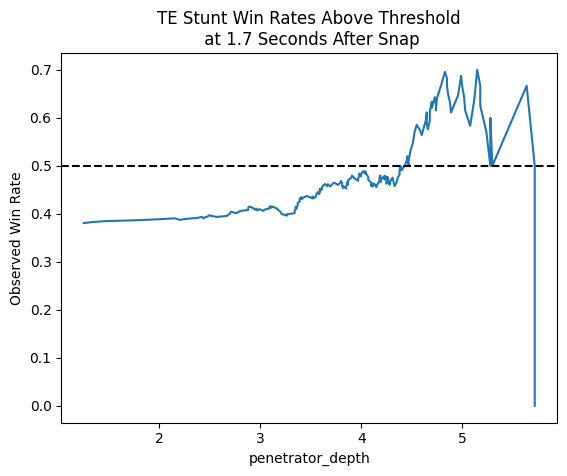

In [49]:
rate_array = np.array(get_win_rates_gt(data = pro_frames_merge_trunc, 
                                       stunt_type = 'TE', 
                                       frame = 17, 
                                       frame_center = 'frame_from_snap', 
                                       feature = 'penetrator_depth', 
                                       bound = 0.0))
plt.plot(rate_array[:,0], rate_array[:,1])
plt.axhline(y = 0.5, linestyle = '--', color = 'black')
plt.title('TE Stunt Win Rates Above Threshold\n at 1.7 Seconds After Snap')
plt.gca().set_xlabel('penetrator_depth')
plt.gca().set_ylabel('Observed Win Rate')
plt.savefig(os.path.join(plots_dir,'win_rate_curve.png'))

In [50]:
te_thresholds = get_feature_threshold_df(pro_frames_merge_trunc, 'frame_from_snap', 'TE', features_of_interest)
te_thresholds

,penetrator_depth,penetrator_depth_delta,mean_qb_squareness,mean_qb_squareness_delta,squareness_in,squareness_out,open_outside_in,open_outside_out,y_diff,s_in,s_out
1,-0.08,0.09,96.272763,NaN,177.60,NaN,NaN,NaN,NaN,0.60,0.83
2,0.01,0.16,92.135822,2.252017,176.58,NaN,NaN,NaN,NaN,0.89,1.12
3,0.10,0.21,57.953026,NaN,168.21,NaN,NaN,NaN,NaN,1.39,1.40
4,0.26,0.23,56.653009,5.076606,167.59,NaN,NaN,NaN,0.87,1.75,1.67
5,0.49,0.25,56.663824,NaN,166.15,NaN,NaN,NaN,0.88,NaN,2.02
6,0.72,0.29,54.396176,NaN,158.80,NaN,NaN,NaN,1.02,NaN,2.09
7,1.03,0.33,54.300634,NaN,156.05,60.52,NaN,21.31,NaN,NaN,2.27
8,1.34,0.33,55.260885,NaN,168.55,21.78,NaN,13.81,0.68,2.95,2.34
9,1.73,0.33,54.127060,NaN,60.32,18.03,56.29,17.29,0.61,3.26,2.64
10,1.98,0.37,60.451030,5.217881,62.16,21.65,63.91,16.11,NaN,3.46,NaN


In [51]:
''.join(te_thresholds.to_html().split(sep = '\n'))

'<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>penetrator_depth</th>      <th>penetrator_depth_delta</th>      <th>mean_qb_squareness</th>      <th>mean_qb_squareness_delta</th>      <th>squareness_in</th>      <th>squareness_out</th>      <th>open_outside_in</th>      <th>open_outside_out</th>      <th>y_diff</th>      <th>s_in</th>      <th>s_out</th>    </tr>  </thead>  <tbody>    <tr>      <th>1</th>      <td>-0.08</td>      <td>0.09</td>      <td>96.272763</td>      <td>NaN</td>      <td>177.60</td>      <td>NaN</td>      <td>NaN</td>      <td>NaN</td>      <td>NaN</td>      <td>0.60</td>      <td>0.83</td>    </tr>    <tr>      <th>2</th>      <td>0.01</td>      <td>0.16</td>      <td>92.135822</td>      <td>2.252017</td>      <td>176.58</td>      <td>NaN</td>      <td>NaN</td>      <td>NaN</td>      <td>NaN</td>      <td>0.89</td>      <td>1.12</td>    </tr>    <tr>      <th>3</th>      <td>0.10</td>      <td>0.21</td>  

In [52]:
te_otrs = get_over_threshold_rates(te_rep_frames, te_thresholds)  
te_otrs

,count,penetrator_depth,penetrator_depth_delta,mean_qb_squareness,mean_qb_squareness_delta,squareness_in,squareness_out,open_outside_in,open_outside_out,y_diff,s_in,s_out
1,6.0,0.500000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.333333
2,6.0,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.333333
3,6.0,0.500000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333
4,6.0,0.500000,0.000000,0.333333,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333
5,6.0,0.500000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667
6,6.0,0.500000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333
7,6.0,0.500000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333
8,6.0,0.500000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.166667,0.166667,0.000000,0.333333
9,6.0,0.166667,0.000000,0.166667,0.000000,0.000000,0.166667,0.000000,0.166667,0.500000,0.000000,0.000000
10,6.0,0.500000,0.000000,0.000000,0.166667,0.166667,0.166667,0.166667,0.333333,0.000000,0.000000,0.000000


In [53]:
''.join(te_otrs.to_html().split(sep = '\n'))

'<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>count</th>      <th>penetrator_depth</th>      <th>penetrator_depth_delta</th>      <th>mean_qb_squareness</th>      <th>mean_qb_squareness_delta</th>      <th>squareness_in</th>      <th>squareness_out</th>      <th>open_outside_in</th>      <th>open_outside_out</th>      <th>y_diff</th>      <th>s_in</th>      <th>s_out</th>    </tr>  </thead>  <tbody>    <tr>      <th>1</th>      <td>6.0</td>      <td>0.500000</td>      <td>0.166667</td>      <td>0.000000</td>      <td>0.000000</td>      <td>0.000000</td>      <td>0.000000</td>      <td>0.000000</td>      <td>0.000000</td>      <td>0.000000</td>      <td>0.166667</td>      <td>0.333333</td>    </tr>    <tr>      <th>2</th>      <td>6.0</td>      <td>0.500000</td>      <td>0.000000</td>      <td>0.000000</td>      <td>0.000000</td>      <td>0.000000</td>      <td>0.000000</td>      <td>0.000000</td>      <td>0.000000</td>      <t

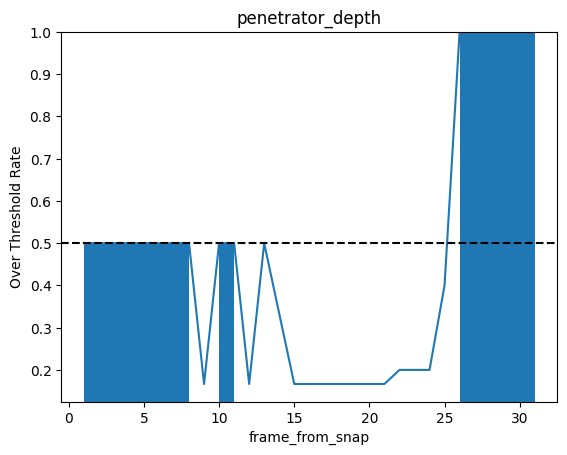

In [55]:
plot_otrs(te_otrs, 'penetrator_depth')
plt.savefig(os.path.join(plots_dir,'te_pd_interval.png'))

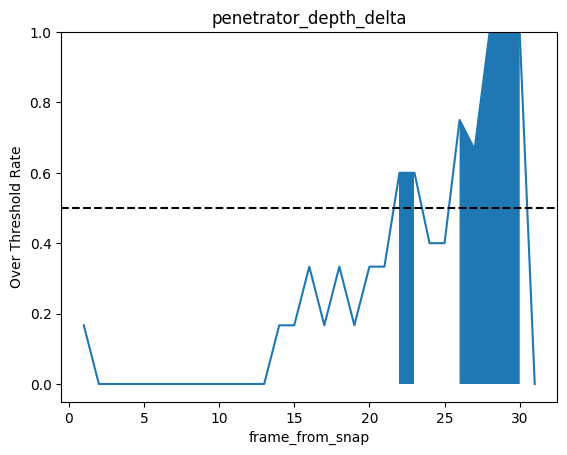

In [56]:
plot_otrs(te_otrs, 'penetrator_depth_delta')
plt.savefig(os.path.join(plots_dir,'te_pdd_interval.png'))

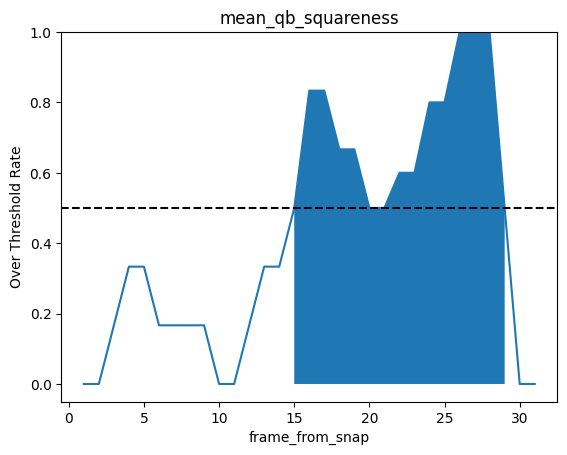

In [57]:
plot_otrs(te_otrs, 'mean_qb_squareness')
plt.savefig(os.path.join(plots_dir,'te_mqs_interval.png'))

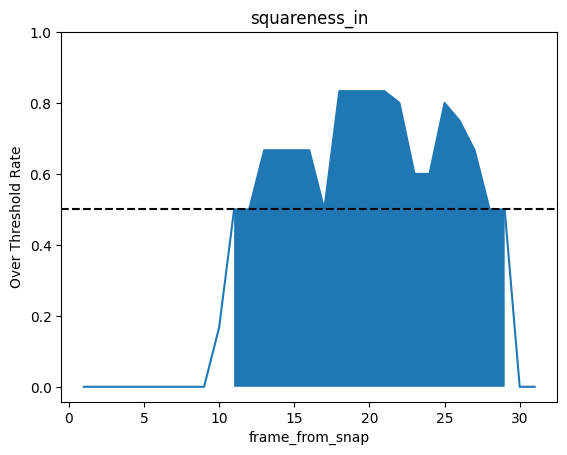

In [58]:
plot_otrs(te_otrs, 'squareness_in')
plt.savefig(os.path.join(plots_dir,'te_sq_in.png'))

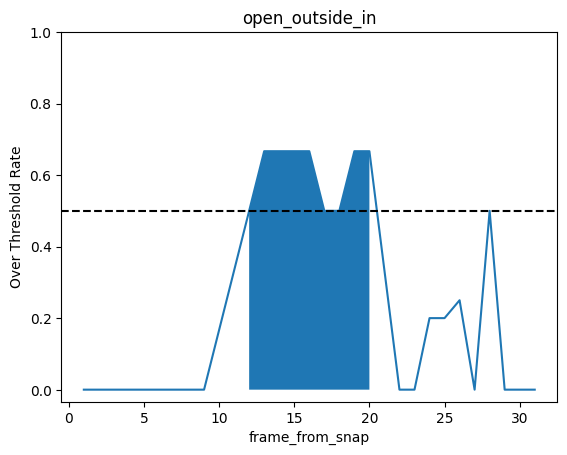

In [59]:
plot_otrs(te_otrs, 'open_outside_in')
plt.savefig(os.path.join(plots_dir,'te_open_in_interval.png'))

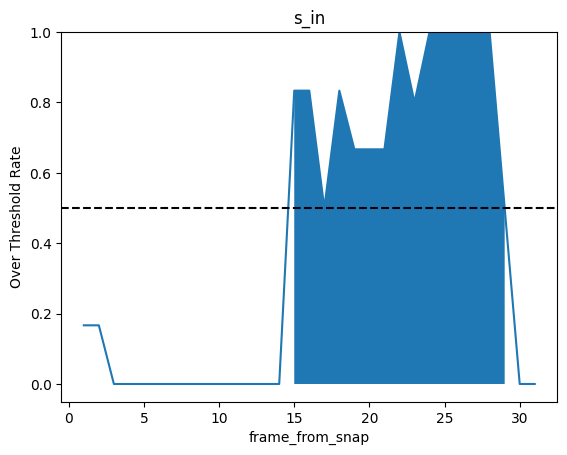

In [60]:
plot_otrs(te_otrs, 's_in')
plt.savefig(os.path.join(plots_dir,'te_speed_in_interval.png'))

In [61]:
crg_reps = get_pair_reps(den_pairs.loc[220])
crg_reps

,gameId,playId,stuntId,player_in,pos_in,player_out,pos_out,team,stunt_type,exchange,proba,pred,rush_win
4110,2021091212,1199,1.0,Lloyd Cushenberry,C,Dalton Risner,LG,DEN,TT,1,0.900030,1,1.0
5956,2021091904,2723,1.0,Lloyd Cushenberry,C,Dalton Risner,LG,DEN,TT,1,0.836632,1,0.0
18582,2021101006,2192,1.0,Lloyd Cushenberry,C,Dalton Risner,LG,DEN,TT,1,0.075959,0,0.0
24748,2021101709,4001,1.0,Lloyd Cushenberry,C,Dalton Risner,LG,DEN,TT,1,0.564830,1,0.0
25840,2021102100,267,1.0,Lloyd Cushenberry,C,Dalton Risner,LG,DEN,TT,1,0.223576,0,0.0
26095,2021102100,2248,1.0,Lloyd Cushenberry,C,Dalton Risner,LG,DEN,TT,1,0.074102,0,0.0
31559,2021103110,1970,1.0,Lloyd Cushenberry,C,Dalton Risner,LG,DEN,TT,1,0.304212,0,1.0


In [62]:
''.join(crg_reps.set_index(np.arange(1,len(crg_reps)+1)).to_html().split(sep = '\n'))

'<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>gameId</th>      <th>playId</th>      <th>stuntId</th>      <th>player_in</th>      <th>pos_in</th>      <th>player_out</th>      <th>pos_out</th>      <th>team</th>      <th>stunt_type</th>      <th>exchange</th>      <th>proba</th>      <th>pred</th>      <th>rush_win</th>    </tr>  </thead>  <tbody>    <tr>      <th>1</th>      <td>2021091212</td>      <td>1199</td>      <td>1.0</td>      <td>Lloyd Cushenberry</td>      <td>C</td>      <td>Dalton Risner</td>      <td>LG</td>      <td>DEN</td>      <td>TT</td>      <td>1</td>      <td>0.900030</td>      <td>1</td>      <td>1.0</td>    </tr>    <tr>      <th>2</th>      <td>2021091904</td>      <td>2723</td>      <td>1.0</td>      <td>Lloyd Cushenberry</td>      <td>C</td>      <td>Dalton Risner</td>      <td>LG</td>      <td>DEN</td>      <td>TT</td>      <td>1</td>      <td>0.836632</td>      <td>1</td>      <td>0.0</td>    </tr

In [63]:
crg_summary = get_pair_summary(crg_reps)
''.join(crg_summary.to_html().split(sep = '\n'))

'<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>count</th>      <th>mean_proba</th>      <th>win_rate_exp</th>      <th>win_rate_act</th>      <th>win_rate_below_exp</th>    </tr>    <tr>      <th>stunt_type</th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>    </tr>  </thead>  <tbody>    <tr>      <th>TT</th>      <td>7</td>      <td>0.42562</td>      <td>0.428571</td>      <td>0.285714</td>      <td>0.142857</td>    </tr>  </tbody></table>'

In [64]:
tt_rep_frames = get_rep_frames(pro_frames_merge_trunc, crg_reps, features_of_interest)
tt_thresholds = get_feature_threshold_df(pro_frames_merge_trunc, 'frame_from_snap', 'TE', features_of_interest)
tt_thresholds

,penetrator_depth,penetrator_depth_delta,mean_qb_squareness,mean_qb_squareness_delta,squareness_in,squareness_out,open_outside_in,open_outside_out,y_diff,s_in,s_out
1,-0.08,0.09,96.272763,NaN,177.60,NaN,NaN,NaN,NaN,0.60,0.83
2,0.01,0.16,92.135822,2.252017,176.58,NaN,NaN,NaN,NaN,0.89,1.12
3,0.10,0.21,57.953026,NaN,168.21,NaN,NaN,NaN,NaN,1.39,1.40
4,0.26,0.23,56.653009,5.076606,167.59,NaN,NaN,NaN,0.87,1.75,1.67
5,0.49,0.25,56.663824,NaN,166.15,NaN,NaN,NaN,0.88,NaN,2.02
6,0.72,0.29,54.396176,NaN,158.80,NaN,NaN,NaN,1.02,NaN,2.09
7,1.03,0.33,54.300634,NaN,156.05,60.52,NaN,21.31,NaN,NaN,2.27
8,1.34,0.33,55.260885,NaN,168.55,21.78,NaN,13.81,0.68,2.95,2.34
9,1.73,0.33,54.127060,NaN,60.32,18.03,56.29,17.29,0.61,3.26,2.64
10,1.98,0.37,60.451030,5.217881,62.16,21.65,63.91,16.11,NaN,3.46,NaN


In [65]:
tt_otrs = get_over_threshold_rates(tt_rep_frames, tt_thresholds)  
tt_otrs

,count,penetrator_depth,penetrator_depth_delta,mean_qb_squareness,mean_qb_squareness_delta,squareness_in,squareness_out,open_outside_in,open_outside_out,y_diff,s_in,s_out
1,7.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.571429,0.000000
2,7.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.571429,0.000000
3,7.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000
4,7.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,7.0,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,7.0,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,7.0,0.000000,0.285714,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000
8,7.0,0.000000,0.142857,0.000000,0.000000,0.000000,0.285714,0.000000,0.571429,0.000000,0.000000,0.000000
9,7.0,0.000000,0.285714,0.000000,0.000000,0.000000,0.428571,0.000000,0.428571,0.000000,0.000000,0.000000
10,7.0,0.000000,0.142857,0.000000,0.142857,0.000000,0.285714,0.000000,0.428571,0.000000,0.000000,0.000000


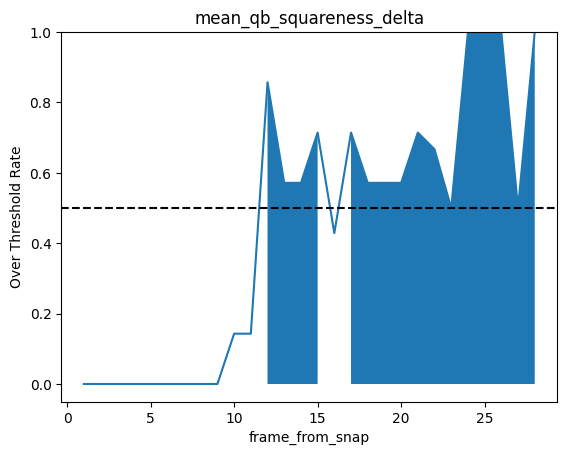

In [66]:
plot_otrs(tt_otrs, 'mean_qb_squareness_delta')
plt.savefig(os.path.join(plots_dir,'tt_mqsd_interval.png'))

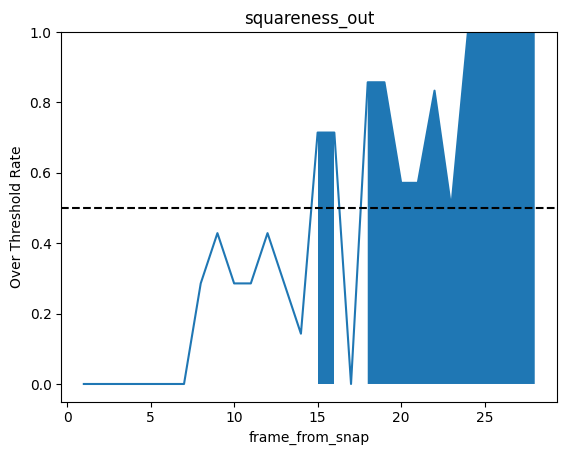

In [67]:
plot_otrs(tt_otrs, 'squareness_out')
plt.savefig(os.path.join(plots_dir,'tt_sq_out_interval.png'))

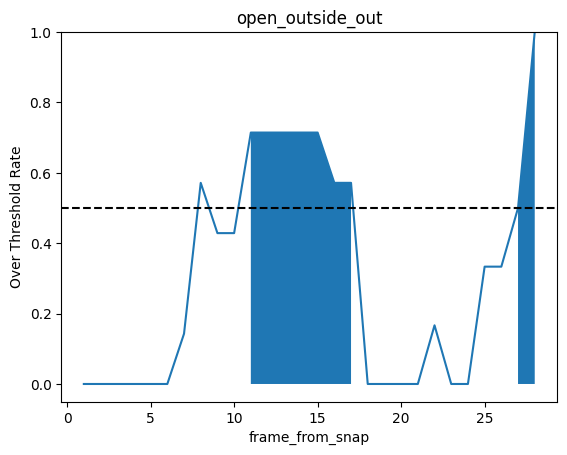

In [68]:
plot_otrs(tt_otrs, 'open_outside_out')
plt.savefig(os.path.join(plots_dir,'tt_open_out_interval.png'))

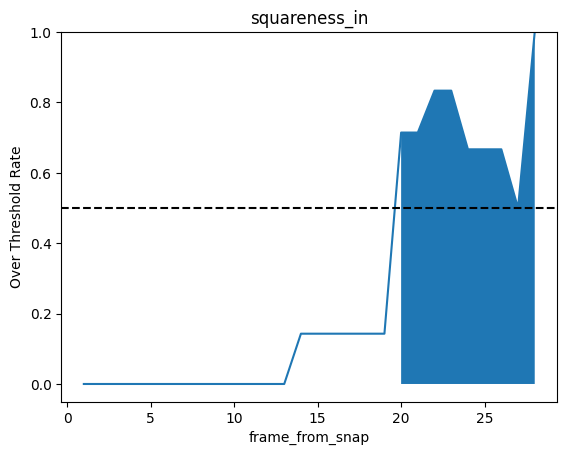

In [69]:
plot_otrs(tt_otrs, 'squareness_in')
plt.savefig(os.path.join(plots_dir,'tt_sq_in_interval.png'))

In [70]:
lgt_reps = get_pair_reps(den_pairs.loc[181])
lgt_reps

,gameId,playId,stuntId,player_in,pos_in,player_out,pos_out,team,stunt_type,exchange,proba,pred,rush_win
5922,2021091904,1962,1.0,Dalton Risner,LG,Garett Bolles,LT,DEN,ET,0,0.900928,1,1.0
6100,2021091904,3533,1.0,Dalton Risner,LG,Garett Bolles,LT,DEN,ET,0,0.235012,0,0.0
24414,2021101709,1757,1.0,Dalton Risner,LG,Garett Bolles,LT,DEN,TE,1,0.895283,1,0.0
24592,2021101709,2823,1.0,Dalton Risner,LG,Garett Bolles,LT,DEN,ET,1,0.131048,0,0.0
31722,2021103110,3017,2.0,Dalton Risner,LG,Garett Bolles,LT,DEN,ET,1,0.218599,0,0.0


In [71]:
''.join(lgt_reps.set_index(np.arange(1,len(lgt_reps)+1)).to_html().split(sep = '\n'))

'<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>gameId</th>      <th>playId</th>      <th>stuntId</th>      <th>player_in</th>      <th>pos_in</th>      <th>player_out</th>      <th>pos_out</th>      <th>team</th>      <th>stunt_type</th>      <th>exchange</th>      <th>proba</th>      <th>pred</th>      <th>rush_win</th>    </tr>  </thead>  <tbody>    <tr>      <th>1</th>      <td>2021091904</td>      <td>1962</td>      <td>1.0</td>      <td>Dalton Risner</td>      <td>LG</td>      <td>Garett Bolles</td>      <td>LT</td>      <td>DEN</td>      <td>ET</td>      <td>0</td>      <td>0.900928</td>      <td>1</td>      <td>1.0</td>    </tr>    <tr>      <th>2</th>      <td>2021091904</td>      <td>3533</td>      <td>1.0</td>      <td>Dalton Risner</td>      <td>LG</td>      <td>Garett Bolles</td>      <td>LT</td>      <td>DEN</td>      <td>ET</td>      <td>0</td>      <td>0.235012</td>      <td>0</td>      <td>0.0</td>    </tr>    <

In [72]:
lgt_summary = get_pair_summary(lgt_reps)
''.join(lgt_summary.to_html().split(sep = '\n'))

'<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>count</th>      <th>mean_proba</th>      <th>win_rate_exp</th>      <th>win_rate_act</th>      <th>win_rate_below_exp</th>    </tr>    <tr>      <th>stunt_type</th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>    </tr>  </thead>  <tbody>    <tr>      <th>ET</th>      <td>4</td>      <td>0.371397</td>      <td>0.25</td>      <td>0.25</td>      <td>0.0</td>    </tr>    <tr>      <th>TE</th>      <td>1</td>      <td>0.895283</td>      <td>1.00</td>      <td>0.00</td>      <td>1.0</td>    </tr>  </tbody></table>'

In [73]:
et_reps = rgt_reps.query('stunt_type == "ET"')
et_rep_frames = get_rep_frames(pro_frames_merge_trunc, et_reps, features_of_interest)
et_thresholds = get_feature_threshold_df(pro_frames_merge_trunc, 'frame_from_snap', 'ET', features_of_interest)
et_thresholds

,penetrator_depth,penetrator_depth_delta,mean_qb_squareness,mean_qb_squareness_delta,squareness_in,squareness_out,open_outside_in,open_outside_out,y_diff,s_in,s_out
1,-0.10,0.12,NaN,NaN,NaN,23.48,37.60,21.74,1.10,0.53,0.85
2,-0.00,0.13,NaN,NaN,NaN,24.72,37.65,24.57,1.14,0.74,1.34
3,0.16,0.17,NaN,5.261407,NaN,28.36,34.08,24.83,1.18,NaN,1.60
4,0.34,0.21,NaN,4.486145,NaN,41.57,35.90,26.13,1.03,NaN,1.82
5,0.58,0.24,NaN,3.959602,NaN,41.96,33.94,28.05,1.10,NaN,2.01
6,0.85,0.28,NaN,4.339376,NaN,35.96,35.75,27.63,1.21,NaN,2.11
7,1.10,0.31,NaN,9.736291,NaN,37.88,39.21,34.06,0.98,2.03,2.12
8,1.37,0.33,NaN,7.441529,NaN,55.49,NaN,24.97,1.07,NaN,2.19
9,1.57,0.35,NaN,3.571023,NaN,38.97,NaN,33.62,1.10,NaN,2.21
10,1.85,0.34,NaN,6.046303,NaN,50.89,NaN,35.32,1.38,NaN,2.28


In [74]:
et_otrs = get_over_threshold_rates(et_rep_frames, et_thresholds)  
et_otrs

,count,penetrator_depth,penetrator_depth_delta,mean_qb_squareness,mean_qb_squareness_delta,squareness_in,squareness_out,open_outside_in,open_outside_out,y_diff,s_in,s_out
1,4.0,0.000000,0.250000,0.000000,0.000000,0.0,0.250000,0.0,0.250000,0.000000,0.000000,0.00
2,4.0,0.000000,0.250000,0.000000,0.000000,0.0,0.250000,0.0,0.250000,0.000000,0.000000,0.00
3,4.0,0.000000,0.250000,0.000000,0.000000,0.0,0.250000,0.0,0.250000,0.000000,0.000000,0.00
4,4.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.250000,0.000000,0.000000,0.00
5,4.0,0.000000,0.250000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00
6,4.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.25
7,4.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.25
8,4.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.25
9,4.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.250000,0.000000,0.25
10,4.0,0.000000,0.250000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00


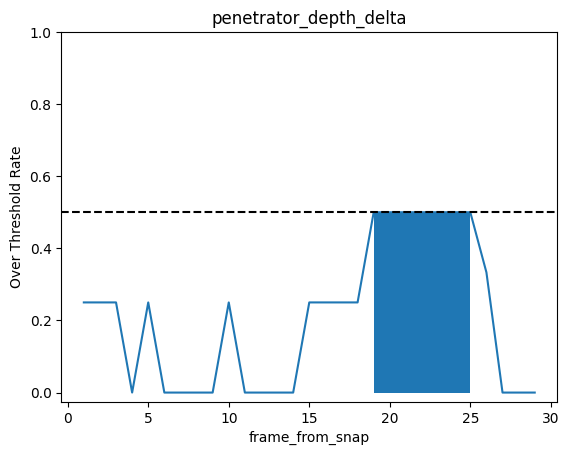

In [75]:
plot_otrs(et_otrs, 'penetrator_depth_delta')
plt.savefig(os.path.join(plots_dir,'et_pdd_interval.png'))

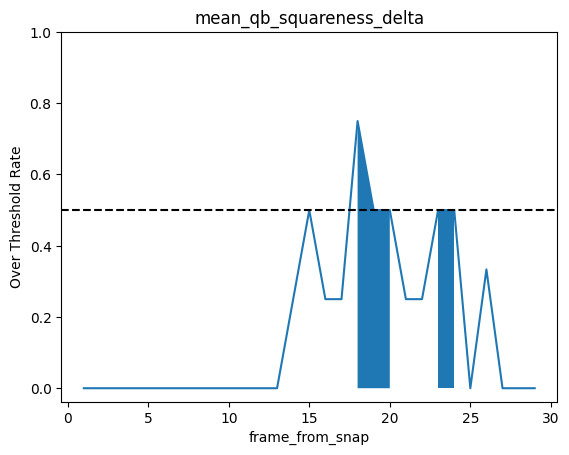

In [76]:
plot_otrs(et_otrs, 'mean_qb_squareness_delta')
plt.savefig(os.path.join(plots_dir,'et_mqsd_interval.png'))

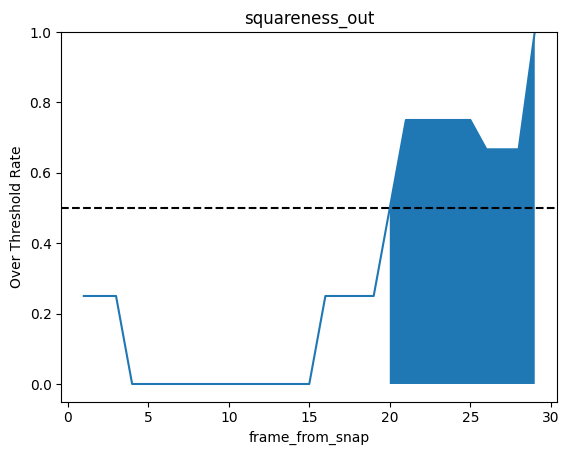

In [77]:
plot_otrs(et_otrs, 'squareness_out')
plt.savefig(os.path.join(plots_dir,'et_sq_out_interval.png'))

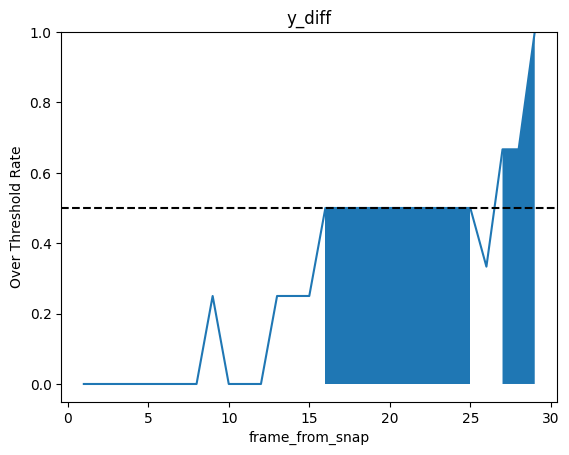

In [78]:
plot_otrs(et_otrs, 'y_diff')
plt.savefig(os.path.join(plots_dir,'et_y_diff.png'))

In [79]:
et_rep_frames2 = get_rep_frames(pro_frames_merge_trunc, et_reps, ['depth_in', 'depth_out'])
et_thresholds2 = get_feature_threshold_df(pro_frames_merge_trunc, 'frame_from_snap', 'ET', ['depth_in', 'depth_out'])
et_otrs2 = get_over_threshold_rates(et_rep_frames2, et_thresholds2)  
et_otrs2

,count,depth_in,depth_out
1,4.0,0.0,0.0
2,4.0,0.0,0.0
3,4.0,0.0,0.0
4,4.0,0.0,0.0
5,4.0,0.0,0.0
6,4.0,0.0,0.0
7,4.0,0.0,0.0
8,4.0,0.0,0.0
9,4.0,0.0,0.0
10,4.0,0.0,0.0


In [81]:
stunt_info = pd.read_csv('../../data/stunt_info.csv', index_col = 0)
stunt_frames = pd.read_csv('../../data/stunt_frames.csv', index_col = 0)
def_reps = stunt_frames[stunt_frames['qb_y_rel'].isna()][['gameId', 'playId', 'team']].drop_duplicates()
def_reps['team'].value_counts().sort_values(ascending = False)

LA     63
MIA    57
TEN    55
DAL    54
NE     53
CLE    52
SEA    51
NO     47
DEN    45
HOU    43
CHI    41
LAC    40
WAS    40
LV     40
CAR    39
BAL    37
PIT    35
ARI    34
IND    34
TB     33
GB     33
NYJ    33
SF     32
NYG    32
CIN    32
MIN    32
KC     26
ATL    25
BUF    24
JAX    20
DET    15
PHI    14
Name: team, dtype: int64

In [82]:
def_info = stunt_info.merge(def_reps, on = ['gameId', 'playId'])
def_summary = def_info['team'].value_counts().sort_values(ascending = False).to_frame()
def_summary['win_rate'] = def_info.groupby('team')['rush_win'].mean()
def_summary

,team,win_rate
LA,67,0.298507
DAL,64,0.328125
CLE,59,0.288136
TEN,59,0.186441
MIA,58,0.465517
NE,57,0.298246
SEA,55,0.381818
DEN,49,0.306122
CHI,47,0.255319
NO,47,0.255319


In [83]:
bft_disp.sort_values('win_rate_act')

,count,mean_proba,win_rate_exp,win_rate_act,win_rate_below_exp
team,,,,,
NYG,50,0.444266,0.300000,0.220000,0.080000
ARI,22,0.406199,0.363636,0.227273,0.136364
BAL,13,0.377172,0.307692,0.230769,0.076923
MIA,25,0.397591,0.280000,0.240000,0.040000
LV,40,0.347954,0.250000,0.250000,0.000000
JAX,39,0.394219,0.333333,0.256410,0.076923
WAS,35,0.396524,0.342857,0.257143,0.085714
GB,19,0.486104,0.473684,0.263158,0.210526
SF,19,0.423155,0.315789,0.263158,0.052632


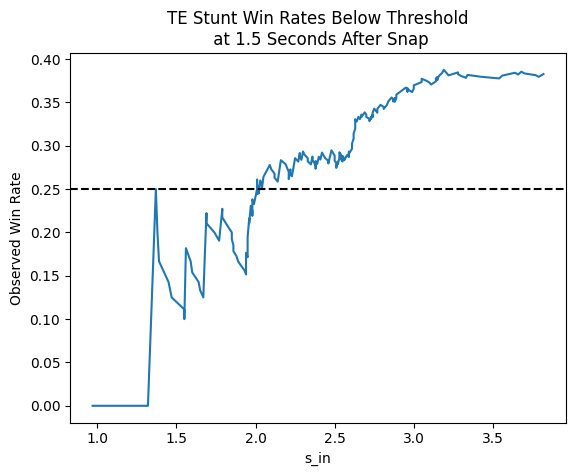

In [84]:
rate_array_lt = np.array(get_win_rates_lt(data = pro_frames_merge_trunc, 
                                       stunt_type = 'TE', 
                                       frame = 15, 
                                       frame_center = 'frame_from_snap', 
                                       feature = 's_in', 
                                       bound = 1.0))
plt.plot(rate_array_lt[:,0], rate_array_lt[:,1])
plt.axhline(y = 0.25, linestyle = '--', color = 'black')
plt.title('TE Stunt Win Rates Below Threshold\n at 1.5 Seconds After Snap')
plt.gca().set_xlabel('s_in')
plt.gca().set_ylabel('Observed Win Rate')
plt.savefig(os.path.join(plots_dir,'win_rate_curve_lt.png'))